# Proyecto Final: Problema de Regresión
## *Quality Prediction in a Mining Process*
## *Caso de estudio: Flotación inversa de hierro (recuperación de hierro y separación de impurezas SiO₂)*

### Descripción del proceso y definiciones 
Una planta de flotación utiliza la *flotación por espuma*, un proceso de separación fisicoquímica, para **concentrar minerales valiosos a partir de  la mena "ore" (concentración de minerales de los cuáles se pueden extraer sustancias valiosas de las cuáles se pueden obtener ganancias)**. 

El proceso de separación sigue la siguiente secuencia:
1. El mineral se muele hasta formar una pulpa.
2. La pulpa se mezcla con reactivos químicos (colectores, espumantes y modificadores) para hacer que los minerales deseados se vuelvan hidrofóbicos (repelentes al agua), mientras que los demás permanecen hidrofílicos (atraídos por el agua).
3. Se introduce aireación, lo que provoca que las partículas hidrofóbicas se adhieran a las burbujas de aire y asciendan a la superficie, formando una espuma valiosa que se recolecta. El material residual, conocido como relaves, se deposita en el fondo de la celda de flotación.

### Contexto del dataset
Este es un dataset proveniente de una **planta industrial real**, del sector minero. La recolección de los datos proviene de una **planta de flotación**.

*Objetivo:* Utilizar los datos para **predecir la cantidad de impurezas en el concentrado de mineral**. Como esta impureza se mide cada hora, si se logra predecir cuánta **sílice (impureza)** hay en el concentrado, podemos brindar a los ingenieros información anticipada para que tomen decisiones. Así, podrán aplicar acciones correctivas con antelación (reducir impurezas, si es el caso) y también contribuir al cuidado del medio ambiente (al reducir la cantidad de mineral que va a relaves, al disminuir la sílice en el mineral concentrado).

### Contenido
- La primera columna muestra el rango de fecha y hora (desde marzo de 2017 hasta septiembre de 2017). Algunas columnas fueron muestreadas cada 20 segundos, otras cada hora.
- Las columnas segunda y tercera contienen medidas de calidad de la pulpa de mineral de hierro justo antes de ser alimentada a la planta de flotación.
- De la columna 4 a la 8 se encuentran las variables más importantes que afectan la calidad del mineral al final del proceso.
- De la columna 9 a la 22 se presentan datos del proceso (nivel y flujo de aire dentro de las columnas de flotación), que también impactan en la calidad del mineral.
- Las dos últimas columnas son mediciones de calidad final de la pulpa de mineral de hierro tomadas en laboratorio.

### Objetivo general 
Explorar la data real industrial y ayudar a las industrias de manufactura a mejorar su efiencia.

### Objetivo especifíco 
Predecir el porcentaje de sílice en el concentrado de mineral de hierro.

*Revisar si es posible resolver las siguientes preguntas*

- ¿Es posible predecir el porcentaje de sílice en el concentrado cada minuto?
- ¿Cuántos pasos (horas) hacia adelante se puede predecir el porcentaje de sílice en el concentrado? Esto ayudaría a los ingenieros a actuar de forma predictiva y optimizada, mitigando el porcentaje de hierro que podría ir a relaves.
- ¿Es posible predecir el porcentaje de sílice en el concentrado sin utilizar la columna de porcentaje de hierro en el concentrado (ya que están altamente correlacionadas)?

### 📚 Investigaciones relacionadas con este conjunto de datos
Artículos de investigación, conferencias y tesis de maestría:

- Predicción de purezas en una planta de flotación por espuma industrial: técnicas de aprendizaje profundo
- Sensor suave: aprendizaje automático tradicional o aprendizaje profundo
- Predicción de calidad basada en aprendizaje automático en el proceso de flotación por espuma en minería

### *Representación del Recuperamiento de Silice en una columna de flotación*
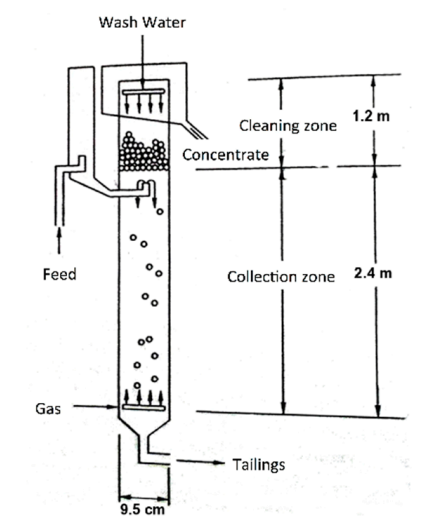

*Tomado de:* **Salinas-Rodríguez, E., Flores-Badillo, J., Hernández-Ávila, J., Cerecedo-Sáenz, E., Gutiérrez-Amador, M. del P., Jeldres, R. I., & Toro, N.** (2020). *Assessment of silica recovery from metallurgical mining waste, by means of column flotation*. Metals, 10(1), 72. https://doi.org/10.3390/met10010072

### Importar librerias 

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format

### Cargar el dataset

In [21]:
MinProcess_Flot_Plant = pd.read_csv("C:/Users/THINKBOOK/Documents/1. ESTUDIOS y FORMACIONES/PROGRAMMING/Data Science/Desarrollos de las clases/Proyecto Final/MiningProcess_Flotation_Plant.csv")
MinProcess_Flot_Plant.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


## Descripción de las variables
### *Variables de tiempo (Rol en el proceso: Referencia temporal)*
|Variable|Significado|Análisis posible|
|--------|-----------|----------------|
|*date_time*|Fecha y hora de cada registro|Series temporales, patrones cíclicos, estabilidad operativa|

### *Variables de alimentación (Rol en el proceso: Entrada)*
|Variable|Significado|Análisis posible|
|--------|-----------|----------------|
|*% Iron Feed*|Porcentaje de hierro en la alimentación|Calidad del mineral, correlación con rendimiento|
|*% Silica Feed*|Porcentaje de sílice en la alimentación|Impurezas iniciales, impacto en eficiencia|
|*Ore Pulp Flow*|Flujo volumétrico de la pulpa del mineral|Balance de masa, sobrecarga o subalimentación|
|*Ore Pulp pH*|pH de la pulpa del mineral|Influencia en flotación, ajuste de reactivos|
|*Ore Pulp Density*|Densidad de la pulpa del mineral|Consistencia del material, eficiencia de separación|

### *Dosificación de reactivos (Rol en el proceso: Control)*
|Variable|Significado|Análisis posible|
|--------|-----------|----------------|
|*Starch Flow*|Flujo de almidón (depresor)|Optimización de reactivos, control de selectividad|
|*Amina Flow*|Flujo de amina (colector)|Impacto en recuperación de hierro y sílice|

### *Aireación por columna (Rol en el proceso: Proceso)*
|Variable|Significado|Análisis posible|
|--------|-----------|----------------|
|*Flotation Column 01 Air Flow*|Flujo de aire en columna 1|Eficiencia de separación, correlación con calidad|
|*Flotation Column 02 Air Flow*|Flujo de aire en columna 2|Distribución de aire, impacto en flotación|
|*Flotation Column 03 Air Flow*|Flujo de aire en columna 3|Comparación entre columnas, optimización|
|*Flotation Column 04 Air Flow*|Flujo de aire en columna 4|Control de burbujeo, análisis de desempeño|
|*Flotation Column 05 Air Flow*|Flujo de aire en columna 5|Relación con niveles y recuperación|
|*Flotation Column 06 Air Flow*|Flujo de aire en columna 6|Identificación de anomalías operativas|
|*Flotation Column 07 Air Flow*|Flujo de aire en columna 7|Evaluación de eficiencia por columna|

### *Nivel de pulpa por columna (Rol en el proceso: Proceso)*
|Variable|Significado|Análisis posible|
|--------|-----------|----------------|
|*Flotation Column 01 Level*|Nivel de pulpa en columna 1|Control de estabilidad, desempeño local|
|*Flotation Column 02 Level*|Nivel de pulpa en columna 2|Detección de sobrecarga o vacíos|
|*Flotation Column 03 Level*|Nivel de pulpa en columna 3|Análisis de eficiencia por columna|
|*Flotation Column 04 Level*|Nivel de pulpa en columna 4|Relación con aireación y reactivos|
|*Flotation Column 05 Level*|Nivel de pulpa en columna 5|Evaluación de condiciones operativas|
|*Flotation Column 06 Level*|Nivel de pulpa en columna 6|Identificación de desviaciones|
|*Flotation Column 07 Level*|Nivel de pulpa en columna 7|Control de proceso por sección|

### *Variables de salida*
|Variable|Significado|Análisis posible|Rol en el proceso|
|--------|-----------|----------------|-----------------|
|*% Iron Concentrate*|Porcentaje de hierro en el concentrado final|Métrica de rendimiento, validación de eficiencia|salida|
|*% Silica Concentrate*|Porcentaje de sílice en el concentrado final|Indicador de impureza, objetivo de predicción|objetivo|

## EDA (Análisis Exploratorio de datos)

In [22]:
#Explorar estructura del dataset
MinProcess_Flot_Plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

*¿Que se observa?* Tenemos un dataframe con 737453 registros y 24 columnas. Se evidencia por el tipo de dato de cada columna, que los datos están guardados como *objetos* en el dataset de origen, ante lo cúal debemos hacer la transformación a número (flotante) en este caso, a excepción de la fecha que para fines de análisis cambiaremos mas adelante.

In [34]:
# 1. Identificar columnas tipo object 
object_cols = MinProcess_Flot_Plant.select_dtypes(include='object').columns

# Excluir la columna específica
cols_to_convert = object_cols.drop("date")

# 2. Convertir cada columna a float
for col in cols_to_convert:
    MinProcess_Flot_Plant[col] = pd.to_numeric(MinProcess_Flot_Plant[col].str.replace(',', '.').str.strip(), errors='coerce')

In [24]:
#Confirmar que las columnas ahora son tipo float
print(MinProcess_Flot_Plant.dtypes) 

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object


Se evidencia ahora sí que todas las columnas son de tipo flotante.

In [25]:
#Buscar valores nulos
MinProcess_Flot_Plant.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

No se evidencian valores nulos en ninguna de las columnas.

### Explorar columnas categoricas 

In [26]:
#Columnas categoricas del dataset
MinProcess_Flot_Plant.select_dtypes(include=[object]).columns

Index(['date'], dtype='object')

Volvemos a corroborar que solo tengamos un columna categorica. En este caso corresponde a la fecha, variable *date* que nos indica el momento exacto de medición.

### Explorando variables númericas

In [35]:
#Columnas númericas del dataset
MinProcess_Flot_Plant.select_dtypes(include=[np.number]).columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

Confirmamos que todas las demás variables son númericas. Para ellas exploramos en un *Boxplot* outliers y valores atipicos presentes.

#### Análisis de variables de alimentación

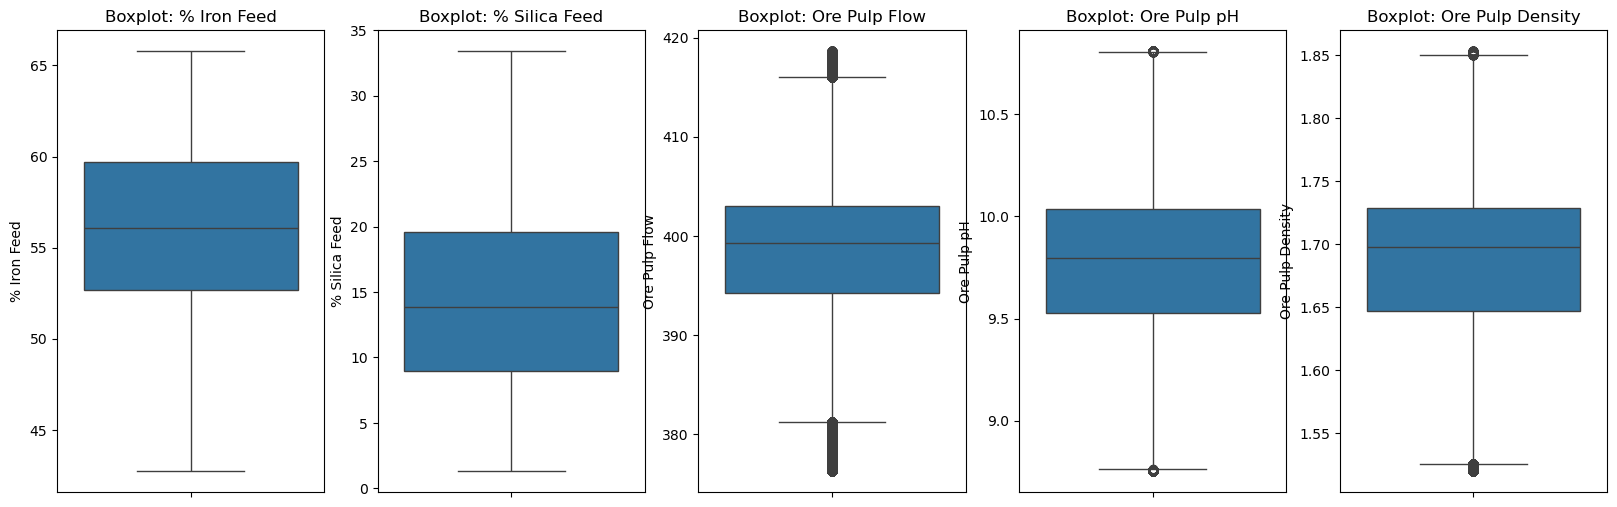

In [28]:
#Boxplot para explorar variables de alimentación 
var_alimentacion = [
    '% Iron Feed',    
    '% Silica Feed',  
    'Ore Pulp Flow',  
    'Ore Pulp pH',
    'Ore Pulp Density'
]

fig, axs = plt.subplots(1, len(var_alimentacion), figsize = (20,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(var_alimentacion):
        ax.set_title("Boxplot: " + f'{var_alimentacion[i]}')
        sns.boxplot(MinProcess_Flot_Plant[var_alimentacion[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*Análisis*: Observamos que las variables *Ore Pulp Flow*, *Ore Pulp PH* y *Ore Pulp Density* presentan outliers, tanto en rangos bajos como en rangos altos, para lo cuál realizaremos un análisis caso por caso, para identificar que outliers eliminar y cuáles conservar.

#### % Iron Feed (Hierro en la alimentación)

*Rangos típico para flotación inversa de hierro:*

- 55% a 68% de Fe en pulpas provenientes de concentración magnética
- Valores superiores a 70% suelen corresponder a concentrados finales, no alimentación
- Valores inferiores a 50% pueden indicar mineral pobre o dilución excesiva

#### % Silica Feed (Silica en la alimentación)
*Rangos típico:*

- 3% a 12% de SiO₂ en pulpas de alimentación
- En concentrados finales se busca <1.5% para procesos como HyL o Midrex
- Valores >15% pueden indicar ganga dominante o falla en clasificación

#### Ore Pulp Flow (Flujo de la pulpa del mineral)
*Rangos típico:*

- Depende del diseño de planta, pero valores comunes están entre **500–1500 m³/h**
- Valores muy bajos (<100 m³/h) o muy altos (>2000 m³/h) pueden indicar fallas de sensor o eventos transitorios

#### Ore Pulp pH (pH de la pulpa del mineral)
*Rangos óptimo para flotación inversa de hierro:*

- **pH entre 9.5 y 11.5** es ideal para flotación de sílice
- pH <9 puede reducir la eficiencia de separación
- pH >12 puede generar precipitación de reactivos

#### Ore Pulp Density (densidad de la pulpa del mineral)
*Rangos típico:*

- **1.2 a 1.5 g/cm³** para pulpas con 30–40% sólidos
- Densidades <1.1 o >1.6 pueden indicar dilución excesiva o sobrecarga

#### Análisis de dosificación de reactivos

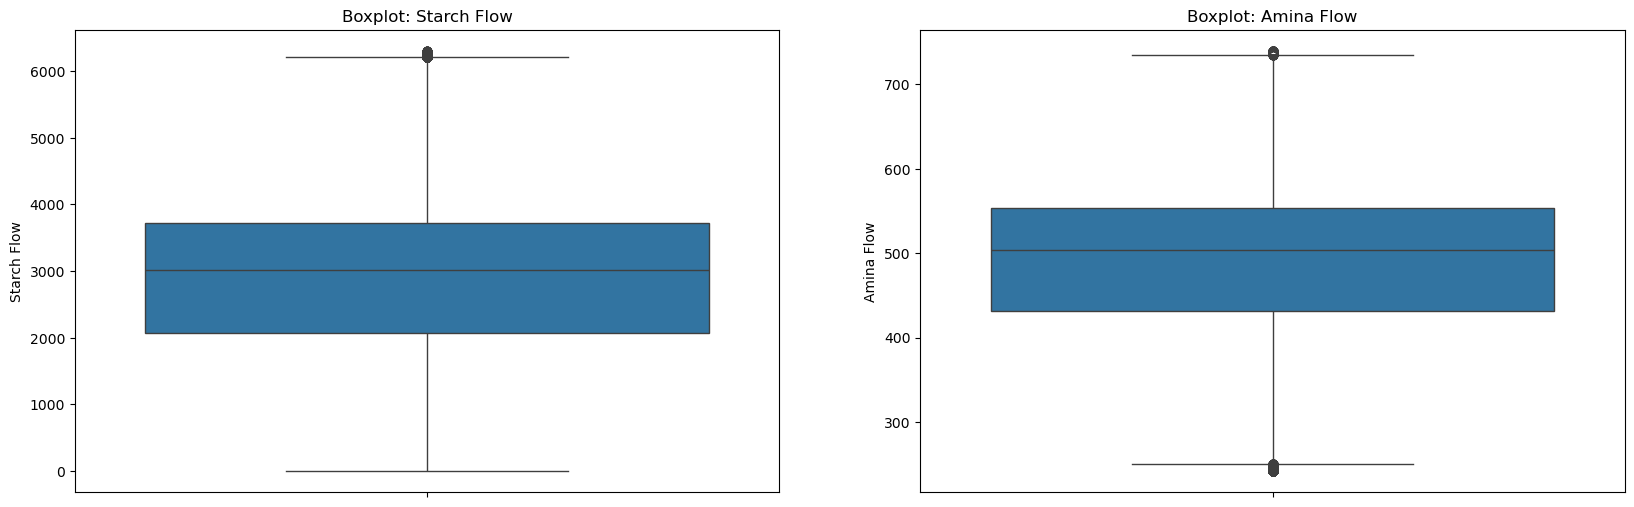

In [29]:
#Boxplot para explorar variables de dosificación de reactivos 
dos_reactivos = [
    'Starch Flow', # flujo de almidon (depresor)
    'Amina Flow'   # flujo de amina (colector)
]

fig, axs = plt.subplots(1, len(dos_reactivos), figsize = (20,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(dos_reactivos):
        ax.set_title("Boxplot: " + f'{dos_reactivos[i]}')
        sns.boxplot(MinProcess_Flot_Plant[dos_reactivos[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*Análisis*: Observamos que las variables *Starch Flow* y *Amina Flow* presentan outliers, en rangos altos y en rangos altos y bajos respectivamente, para lo cuál realizaremos un análisis caso por caso, para identificar que outliers eliminar y cuáles conservar.

#### Starch Flow (Flujo de Almidón)
- El almidón se usa como **depresor** en la flotación, especialmente en minerales como hierro o fosfatos.
- Su dosificación debe ser **estable y proporcional** a la carga de mineral.

*Rangos típicos en plantas industriales:* **1000 a 5000 mL/min**, dependiendo del tipo de mineral y etapa del proceso.

- Un exceso puede **sobredepresar** y reducir la recuperación.
- Un déficit puede **permitir la flotación de ganga**, afectando la calidad del concentrado.

#### Amina Flow (Flujo de Amina)
- Las aminas se usan como **colectores** en flotación de sílice o minerales industriales.
- Su dosificación debe ser **precisa:** exceso puede generar espuma inestable, déficit reduce recuperación.

*Rangos típicos:* **400 a 700 mL/min**, aunque puede variar según el tipo de mineral y pH.

#### Análisis de la Aireación por columna

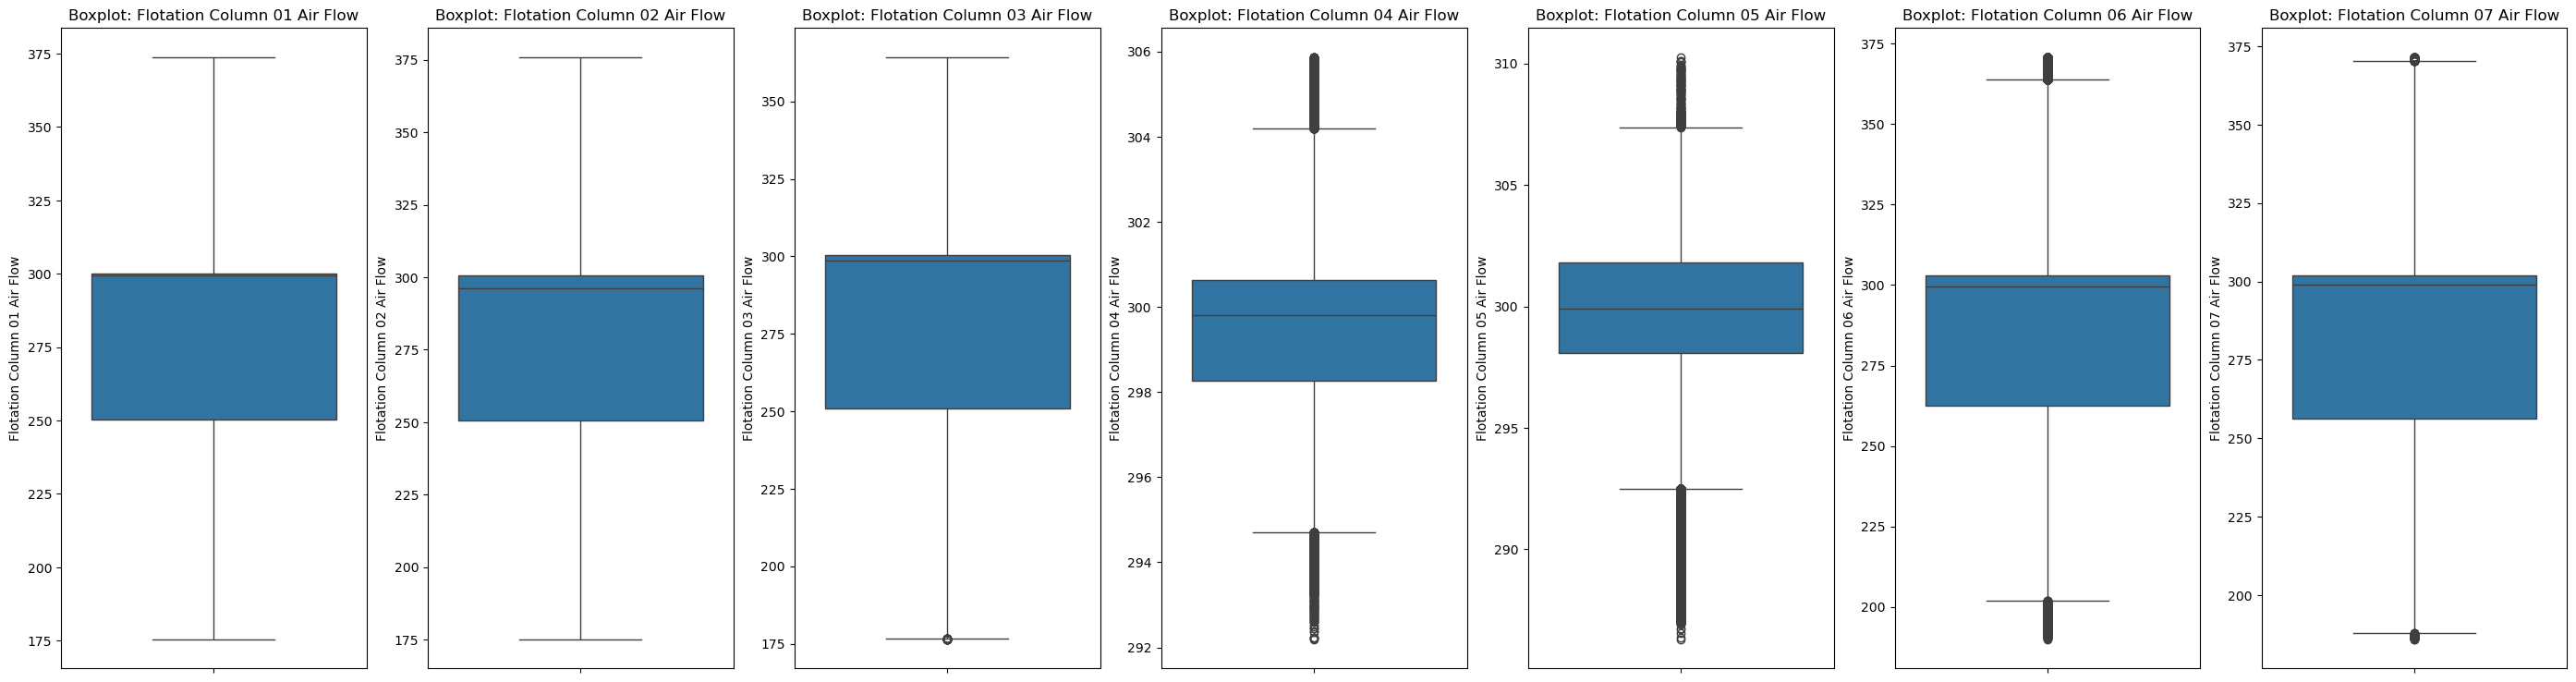

In [30]:
#Boxplot para explorar variables de aireacion por columnas
airflow_columns = [ # flujo de aire en las diferentes columnas 
    'Flotation Column 01 Air Flow', 
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow',
    'Flotation Column 05 Air Flow',
    'Flotation Column 06 Air Flow',
    'Flotation Column 07 Air Flow'
]

fig, axs = plt.subplots(1, len(airflow_columns), figsize = (35,9))
for i, ax in enumerate(axs.flatten()):
    if i < len(airflow_columns):
        ax.set_title("Boxplot: " + f'{airflow_columns[i]}')
        sns.boxplot(MinProcess_Flot_Plant[airflow_columns[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*Análisis*: Observamos que las variables *Flotation Column 04 Air Flow*, *Flotation Column 05 Air Flow*, *Flotation Column 06 Air Flow* y *Flotation Column 07 Air Flow* presentan outliers, en rangos altos y en rangos altos y bajos respectivamente, para lo cuál realizaremos un análisis caso por caso, para identificar que outliers eliminar y cuáles conservar.

#### Air Flow en columnas de flotación
El flujo de aire controla la formación de burbujas, que son esenciales para:

- Separar partículas hidrofóbicas (minerales valiosos) de la ganga
- Mantener la zona de espuma estable
- Evitar arrastre de partículas no deseadas

Por lo tanto, valores extremos en el flujo de aire pueden indicar:

- *Sobreaireación*, burbujas grandes, baja selectividad
- *Subaireación*, burbujas insuficientes, baja recuperación
- *Eventos operativos* reales (cambios de válvula, limpieza, paradas)
- *Errores de sensor* o ruido de medición

A partir de lo anterior se debe:
- Conservar los outliers técnicos que puedan explicar variabilidad del proceso o eventos reales.
- Eliminar los extremos instrumentales que estén fuera del rango físico o confirmados como errores.
- Etiquetar los outliers críticos para análisis predictivo: podrían anticipar fallas o baja eficiencia.

#### Rangos típicos de flujo de aire en columnas de flotación (Nm³/h)
En plantas industriales, el flujo de aire por columna depende del diámetro, altura, tipo de mineral y etapa del proceso:

|Tipo de columna|Rango típico de flujo de aire (Nm³/h)|
|---------------|-------------------------------------|
|Columnas pequeñas (≤1 m diámetro)|50 – 200 Nm³/h|
|Columnas medianas (1–2 m diámetro)|200 – 400 Nm³/h|
|Columnas grandes (≥2.5 m diámetro)|400 – 800 Nm³/h|
|Sobreaireación crítica| >800 Nm³/h|
|Subaireación crítica|< 50 Nm³/h|

#### Análisis de Nivel de pulpa por columna

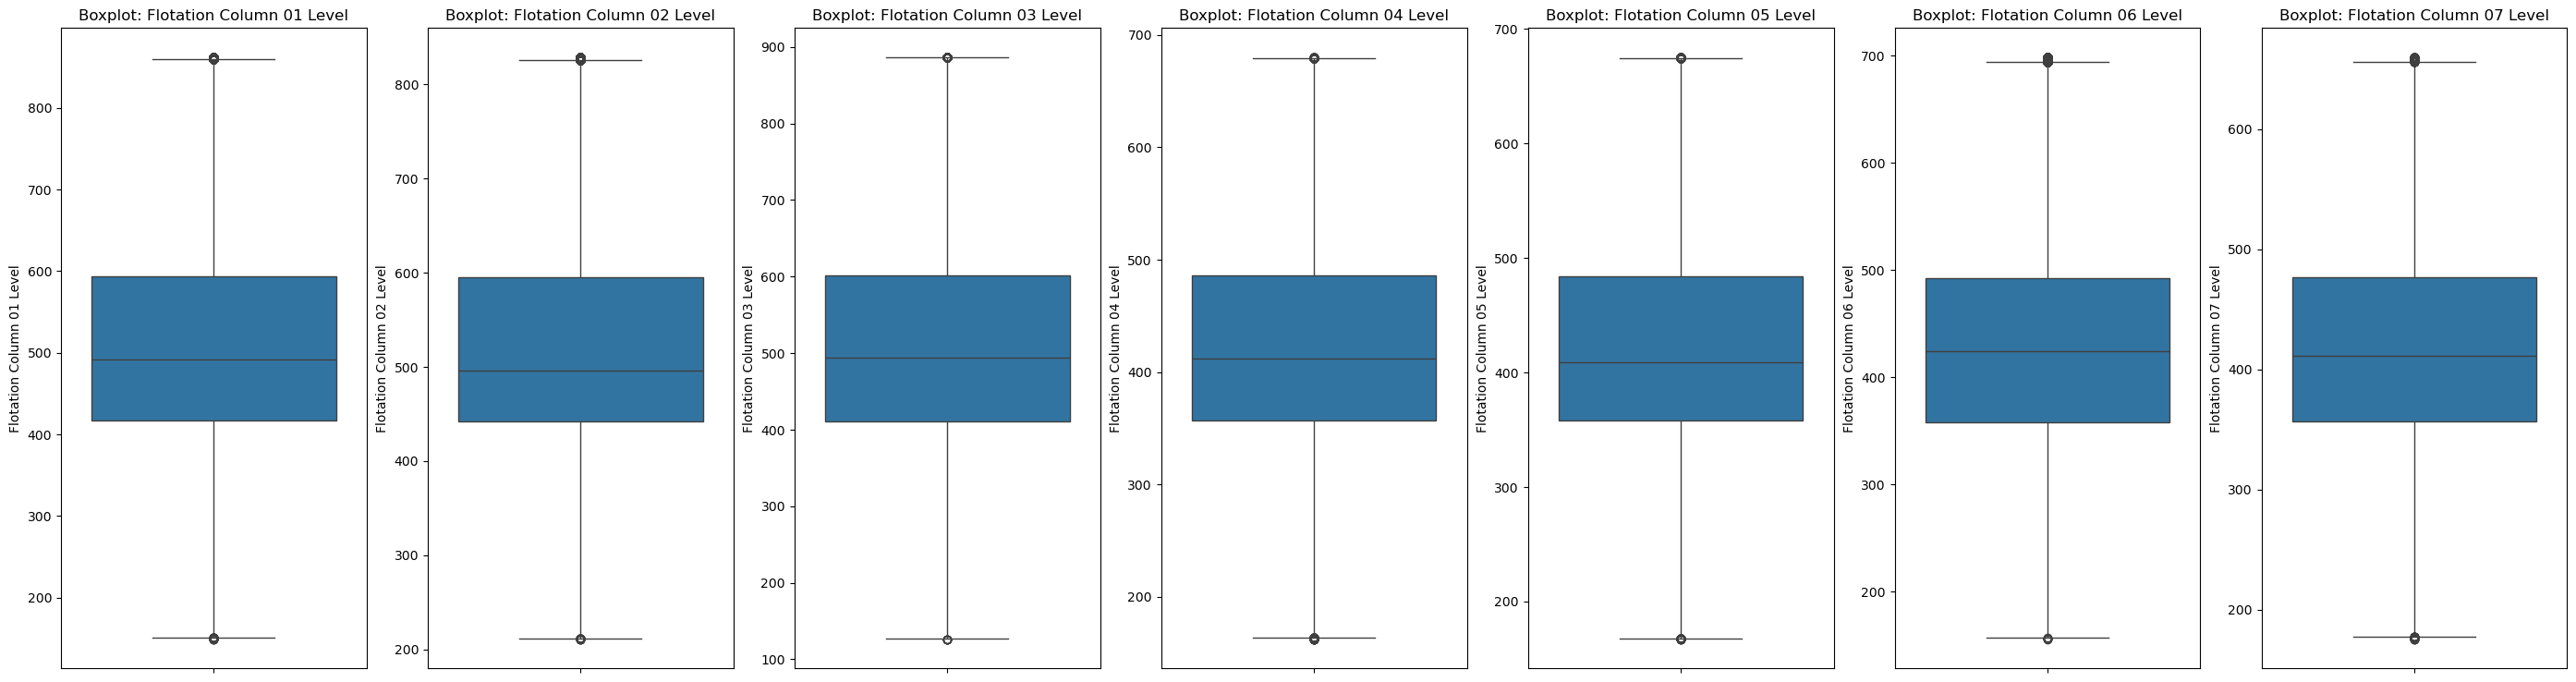

In [31]:
#Boxplot para explorar variables de nivel de pulpa por columna
pulplevel_columns = [ 
    'Flotation Column 01 Level',
    'Flotation Column 02 Level',
    'Flotation Column 03 Level',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level'
]

fig, axs = plt.subplots(1, len(pulplevel_columns), figsize = (35,9))
for i, ax in enumerate(axs.flatten()):
    if i < len(pulplevel_columns):
        ax.set_title("Boxplot: " + f'{pulplevel_columns[i]}')
        sns.boxplot(MinProcess_Flot_Plant[pulplevel_columns[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*Análisis:* Observamos para este caso que todas las variables de nivel de pulpa por columna presentan outliers, en rangos altos y bajos, y que además presentan alta dispersión. Dado que son pocos outliers los datos probablemente son válidos, por tanto los conservaremos. Ahora bien, según las métricas más adelante identificaremos si debemos eliminar outliers en rangos bajos y verificar si el nivel mínimo está por debajo del rango operativo. Si no, conservaremos.

#### Análisis Variables de salida

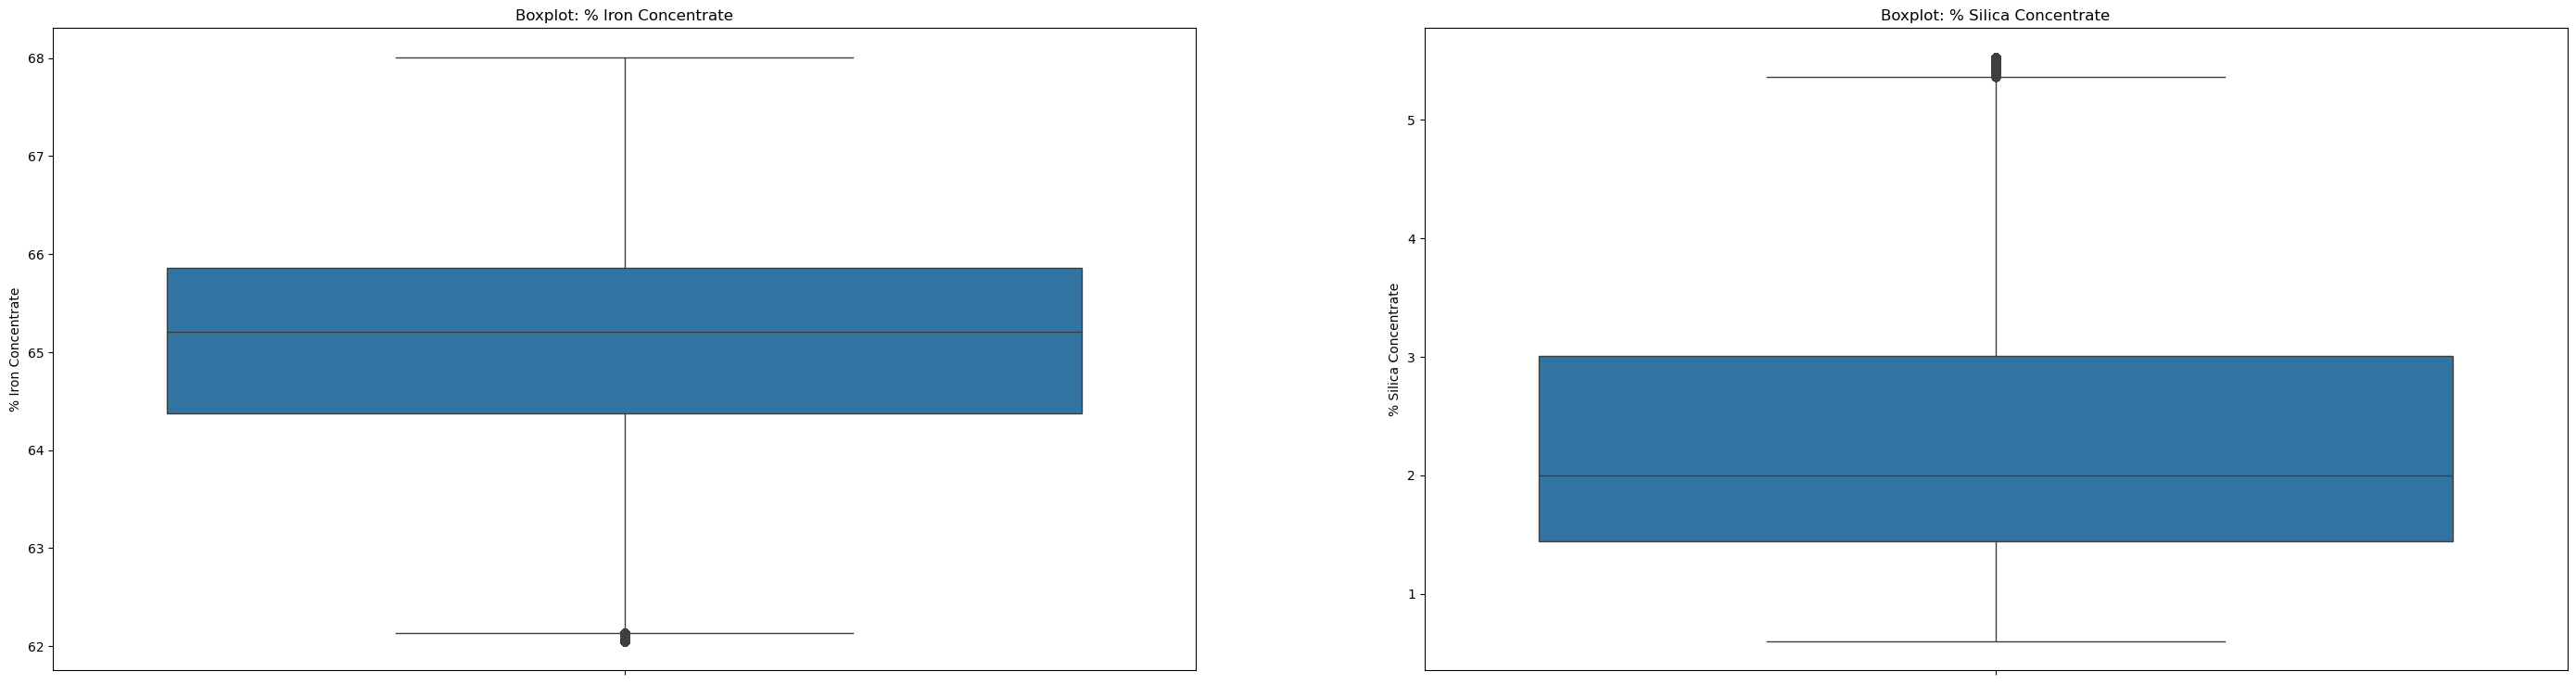

In [32]:
var_salida = [
    '% Iron Concentrate',  # Porcentaje de hierro en el concentrado final
    '% Silica Concentrate' # Porcentaje de sílice en el concentrado final
]

fig, axs = plt.subplots(1, len(var_salida), figsize = (35,9))
for i, ax in enumerate(axs.flatten()):
    if i < len(var_salida):
        ax.set_title("Boxplot: " + f'{var_salida[i]}')
        sns.boxplot(MinProcess_Flot_Plant[var_salida[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*Análisis:* Observamos para este caso que para las variables de salida *% Iron Concentrate* y *% Silica Concentrate*, sin embargo, dado que la variable *Iron Concentrate* esta altamente correlacionada con *Silica concentrate*, estudiaremos nada más esta última.

#### % Silica Concentrate

En procesos de flotación, el porcentaje de sílice en el concentrado constituye un indicador directo de calidad del producto final. Valores elevados de sílice son generalmente indeseables, ya que:

- Disminuyen la pureza del concentrado metálico
- Incrementan los costos asociados a etapas posteriores de refinación
- Pueden evidenciar deficiencias en la eficiencia del proceso de separación de ganga

Por tanto, esta variable no solo es crítica desde el punto de vista metalúrgico, sino que sus valores atípicos (outliers) pueden representar eventos operativos relevantes, como desviaciones en la dosificación de reactivos, variaciones en las condiciones de pulpa o problemas de control en las columnas de flotación.

## Análisis del proceso a partir del EDA
- Identificar correlaciones entre variables del proceso
- Visualizar tendencias temporales, para explorar variabilidad por turnos
- Mapear relaciones físico-químicas: por ejemplo, ¿cómo influye la dosificación de colector o la velocidad de aire en la sílice final?


### Identificar correlaciones entre variables de proceso
### Correlaciones Lineales

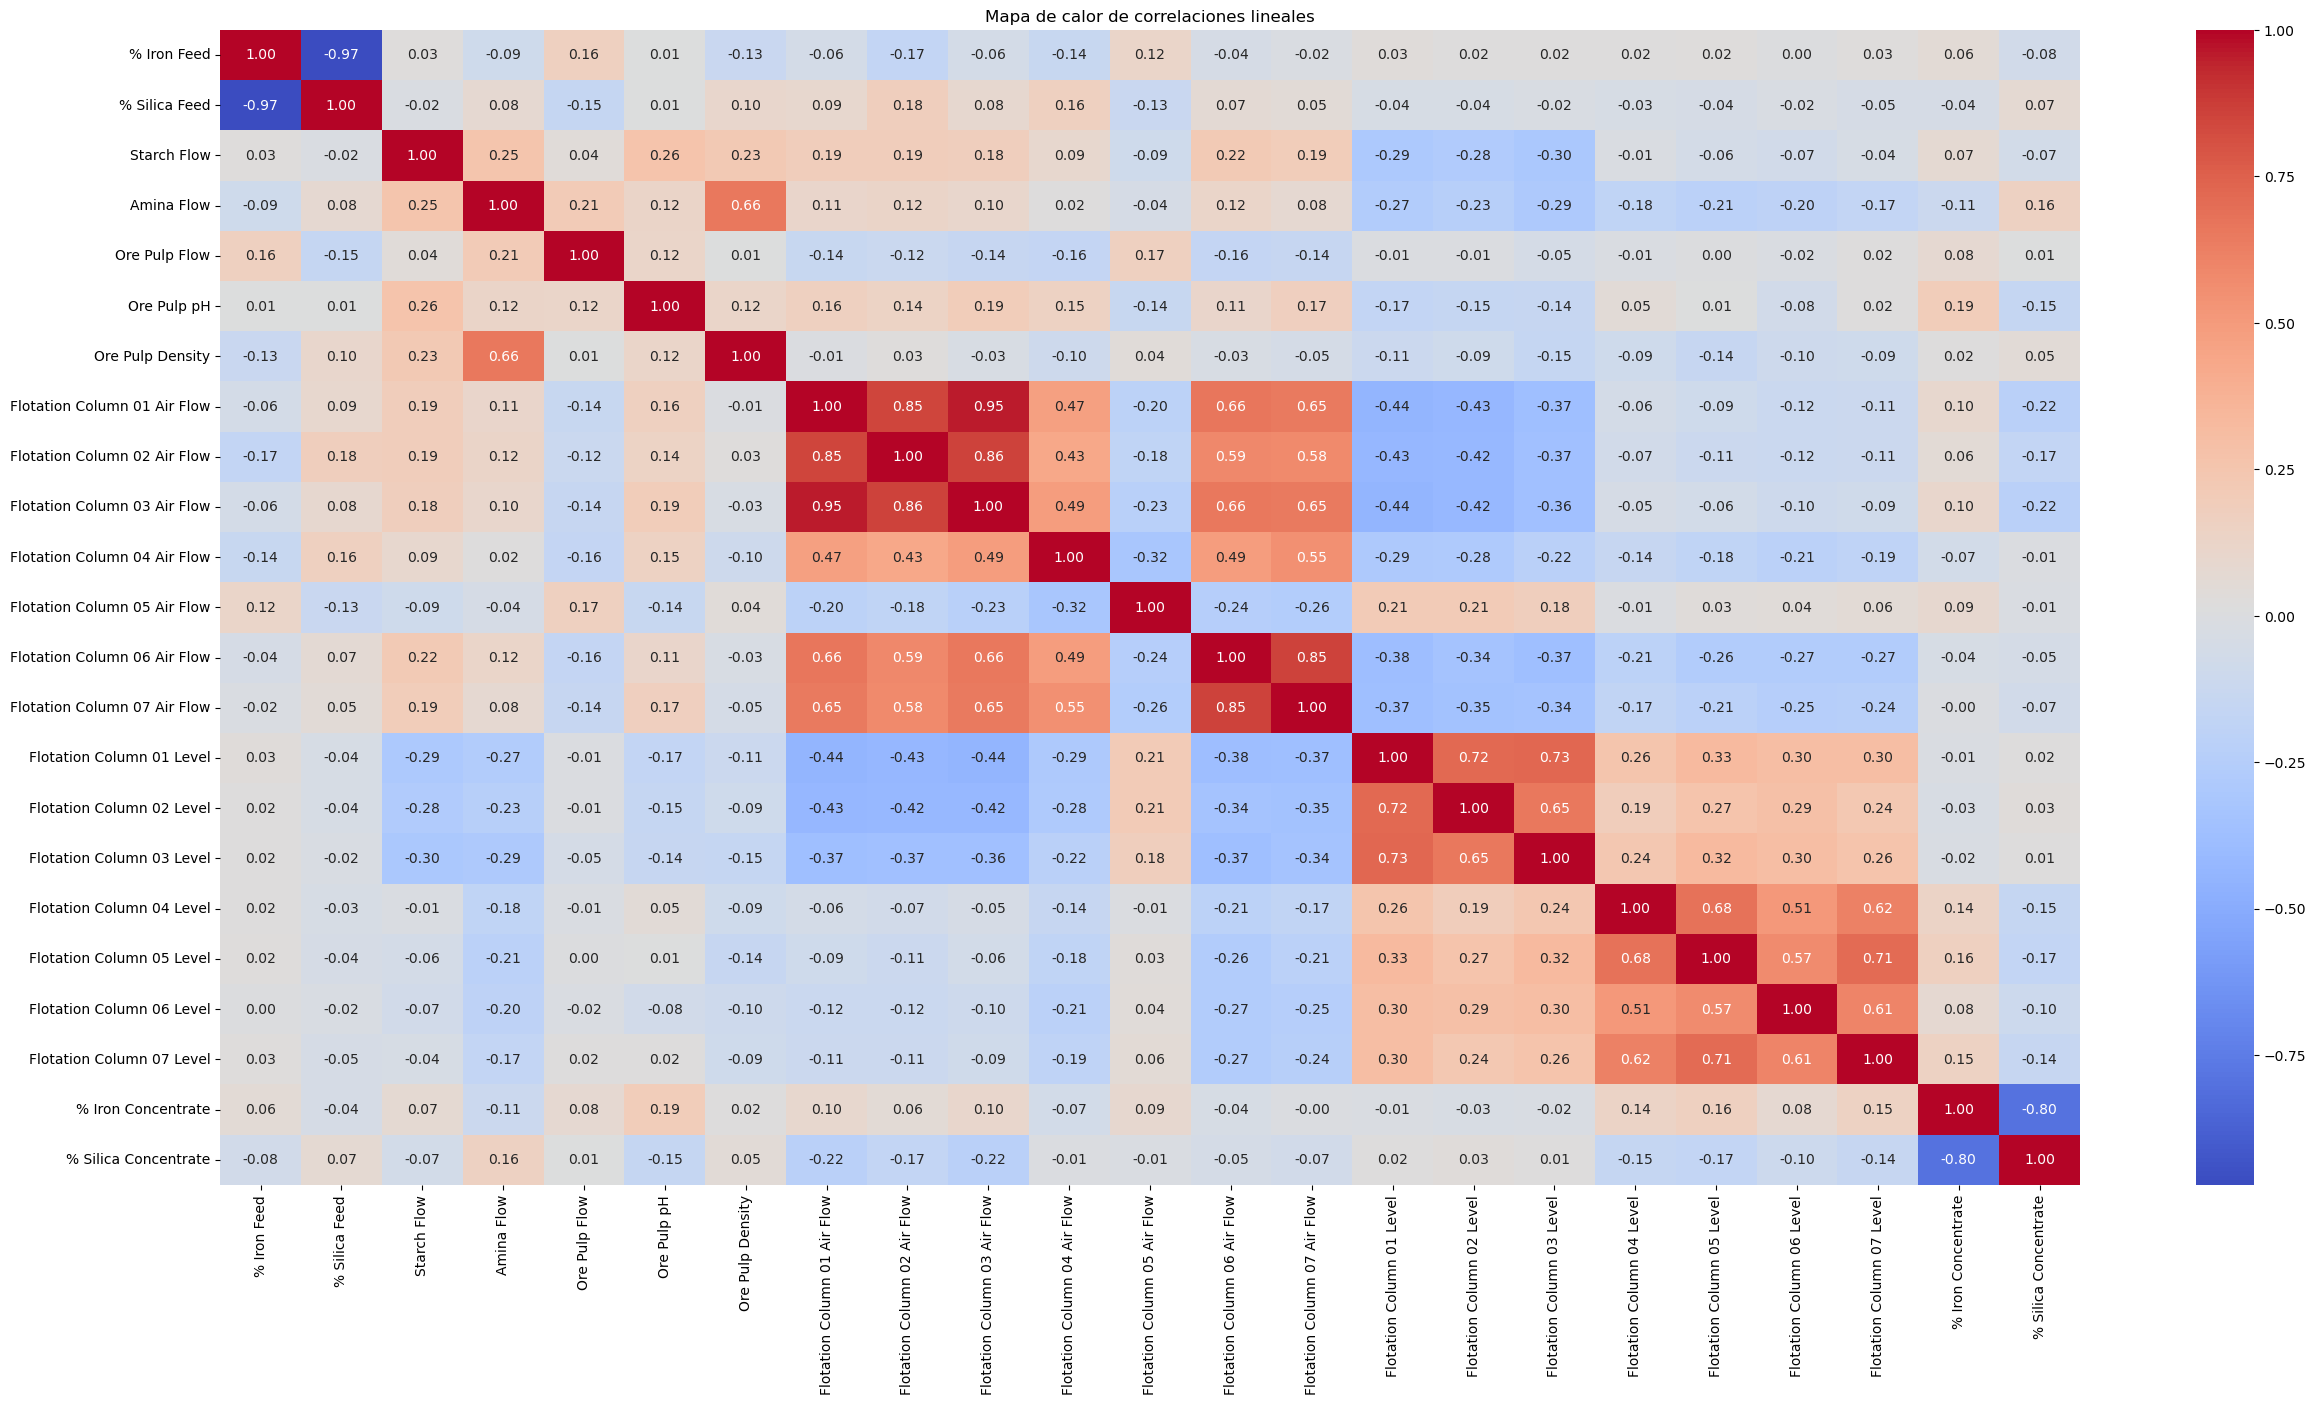

In [37]:
#Correlacion de las variables númericas
MinProcess_Flot_Plant_df = MinProcess_Flot_Plant.drop(columns='date')
MinProcess_Flot_Plant_df.corr() 

#Visualización de un mapa de calor para identificar correlaciones lineales 
plt.figure(figsize=(30,15)) #ajustar el tamano de la figura
sns.heatmap(MinProcess_Flot_Plant_df.corr(), annot=True, cmap='coolwarm', fmt=".2f") #crear mapa de calor
plt.title("Mapa de calor de correlaciones lineales")
plt.show()

*Análisis del mapa de calor de correlaciones lineales*

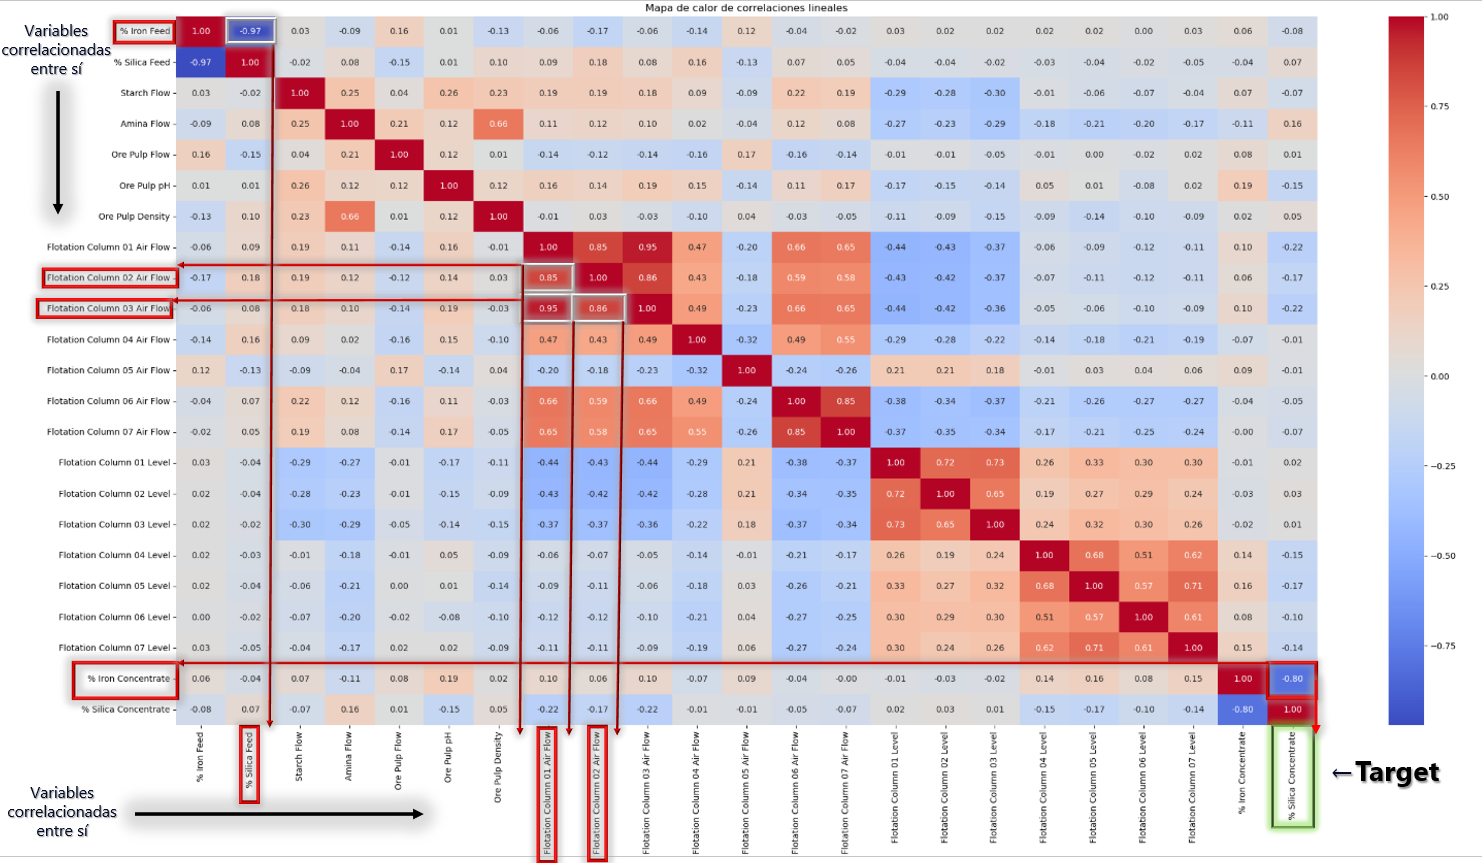

A partir de la visualización del mapa de calor hemos resaltado las variables que están altamente correlacionadas entre sí, y que por tanto nos brindan información similar, lo que nos permite eliminar un de ellas. Observamos entonces que: 
- *Flotation Column 02 Air Flow* se relaciona con *Flotation Column 01 Air Flow*
- *Flotation Column 03 Air Flow* se relaciona con *Flotation Column 01 Air Flow* y *Flotation Column 02 Air Flow*

Así mismo observamos que las variables de alimentación *% Iron Feed* y *% Silica Feed* están inversamente correlacionadas entre sí.

### Calcular el VIF (Variance Inflation Factor)
El **VIF (Variance Inflation Factor)** o **Factor de Inflación de la Varianza** es una métrica estadística que te ayuda a detectar **multicolinealidad** entre variables independientes en un modelo de regresión.

#### Interpretación de los valores VIF
|Valor VIF|Interpretación|Acción recomendada|
|---------|--------------|------------------|
|1|No hay multicolinealidad|✅ Conservar|
|1–5|Multicolinealidad moderada|⚠️ Evaluar impacto|
|>5|Multicolinealidad significativa|❌ Considerar eliminar|
|>10|Muy alta multicolinealidad|🚨 Eliminar o transformar|

Calcularemos el VIF para identificar si realmente a pesar de que dos variables estén correlacionadas es apropiado eliminarlas. 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# MinProcess_Flot_Plant_df es el DataFrame con variables independientes
X = add_constant(MinProcess_Flot_Plant_df)  # Agrega constante para la regresión
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                        Variable      VIF
0                          const 49036.50
1                    % Iron Feed    19.38
2                  % Silica Feed    19.19
3                    Starch Flow     1.27
4                     Amina Flow     2.25
5                  Ore Pulp Flow     1.26
6                    Ore Pulp pH     1.23
7               Ore Pulp Density     2.04
8   Flotation Column 01 Air Flow    12.39
9   Flotation Column 02 Air Flow     4.36
10  Flotation Column 03 Air Flow    13.83
11  Flotation Column 04 Air Flow     1.68
12  Flotation Column 05 Air Flow     1.23
13  Flotation Column 06 Air Flow     4.37
14  Flotation Column 07 Air Flow     4.28
15     Flotation Column 01 Level     2.92
16     Flotation Column 02 Level     2.36
17     Flotation Column 03 Level     2.44
18     Flotation Column 04 Level     2.07
19     Flotation Column 05 Level     2.73
20     Flotation Column 06 Level     1.82
21     Flotation Column 07 Level     2.46
22            % Iron Concentrate  

A partir de los resultados del **Variance Inflation Factor**, observamos que SI es estadisticamente válido eliminar las variables identificadas anteriormente en el diagrama de correlacion de Pearson dado que presentan alta multicolinealidad. Por tanto se tomará la decisión de eliminar *Flotation Column 01 Air Flow*, *Flotation Column 03 Air Flow*. Para el caso de *% Iron Feed* y *% Silica Feed* podemos conservar solo una, idealmente la que tenga mayor correlación con mi variable objetivo o más relevancia técnica para el proceso, la cuál en este caso es *% Silica Feed*.

### Visualizar tendencias temporales: ¿hay variabilidad por turno, día/noche, fines de semana?

In [7]:
# Configurar a datatime la columna de tiempo "date"
MinProcess_Flot_Plant["date"] = pd.to_datetime(MinProcess_Flot_Plant["date"])
#Definir la columna como indice
MinProcess_Flot_Plant = MinProcess_Flot_Plant.set_index("date")

# Crear variables de turno, día/noche o fin de semana
# Ejemplo: Turno 1 (6am-2pm), Turno 2 (2pm-10pm), Turno 3 (10pm-6am)
def asignar_turno(hora):
    if 6 <= hora < 14:
        return "Turno 1 (Mañana)"
    elif 14 <= hora < 22:
        return "Turno 2 (Tarde)"
    else:
        return "Turno 3 (Noche)"

MinProcess_Flot_Plant["turno"] = MinProcess_Flot_Plant.index.hour.map(asignar_turno)

# Día o noche (simplificado: 6am-6pm = día, 6pm-6am = noche)
MinProcess_Flot_Plant["dia_noche"] = MinProcess_Flot_Plant.index.hour.map(lambda h: "Día" if 6 <= h < 18 else "Noche")

# Fin de semana
MinProcess_Flot_Plant["fin_de_semana"] = MinProcess_Flot_Plant.index.dayofweek.map(lambda d: "Sí" if d >= 5 else "No")

In [ ]:
print(MinProcess_Flot_Plant[["turno", "dia_noche", "fin_de_semana"]].head())

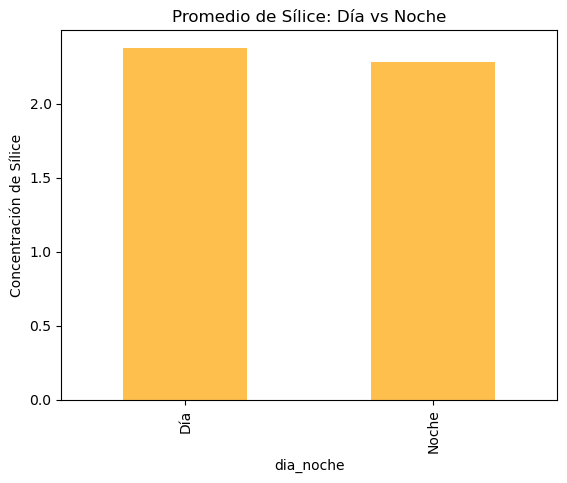

In [8]:
#Visualizar tendencias: variación % silica turno (día/noche)

MinProcess_Flot_Plant.groupby("dia_noche")["% Silica Concentrate"].mean().plot(kind="bar", color="orange", alpha=0.7)
plt.title("Promedio de Sílice: Día vs Noche")
plt.ylabel("Concentración de Sílice")
plt.show()

La diferencia observada de variación % silica concentrate por turno día/noche es minima.

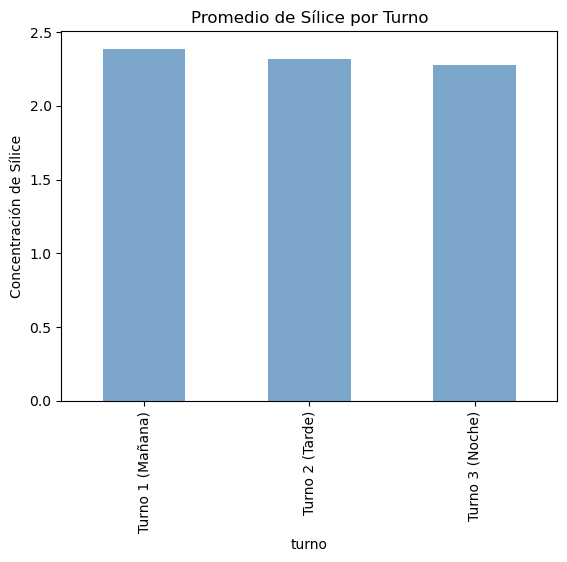

In [11]:
#Visualizar tendencias: variación % silica por los 3 turnos
MinProcess_Flot_Plant.groupby("turno")["% Silica Concentrate"].mean().plot(kind="bar", color="steelblue", alpha=0.7)
plt.title("Promedio de Sílice por Turno")
plt.ylabel("Concentración de Sílice")
plt.show()

La variación observada en el promedio de % Sílica entre los distintos turnos (día, noche y fin de semana) resulta mínima, lo que sugiere que el factor horario no representa una influencia significativa en el comportamiento de la variable objetivo.

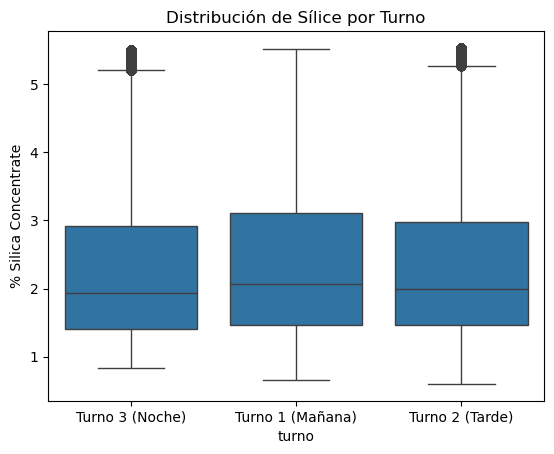

In [13]:
# Visualización por categorías
sns.boxplot(x="turno", y="% Silica Concentrate", data=MinProcess_Flot_Plant)
plt.title("Distribución de Sílice por Turno")
plt.show()

Si bien la variación del promedio de % Sílica entre los turnos (día, noche y fin de semana) resulta mínima, en la gráfica de distribución se aprecia que los turnos 2 y 3 presentan un mayor número de valores atípicos por encima del límite superior de control. Esto sugiere que, aunque el desempeño promedio del proceso se mantiene estable a lo largo de los turnos, existen episodios específicos de inestabilidad en horario nocturno que ameritan una revisión de las condiciones operativas y de factores asociados como mano de obra, temperatura o desempeño de equipos.

### Mapear correlaciones fisico-químicas

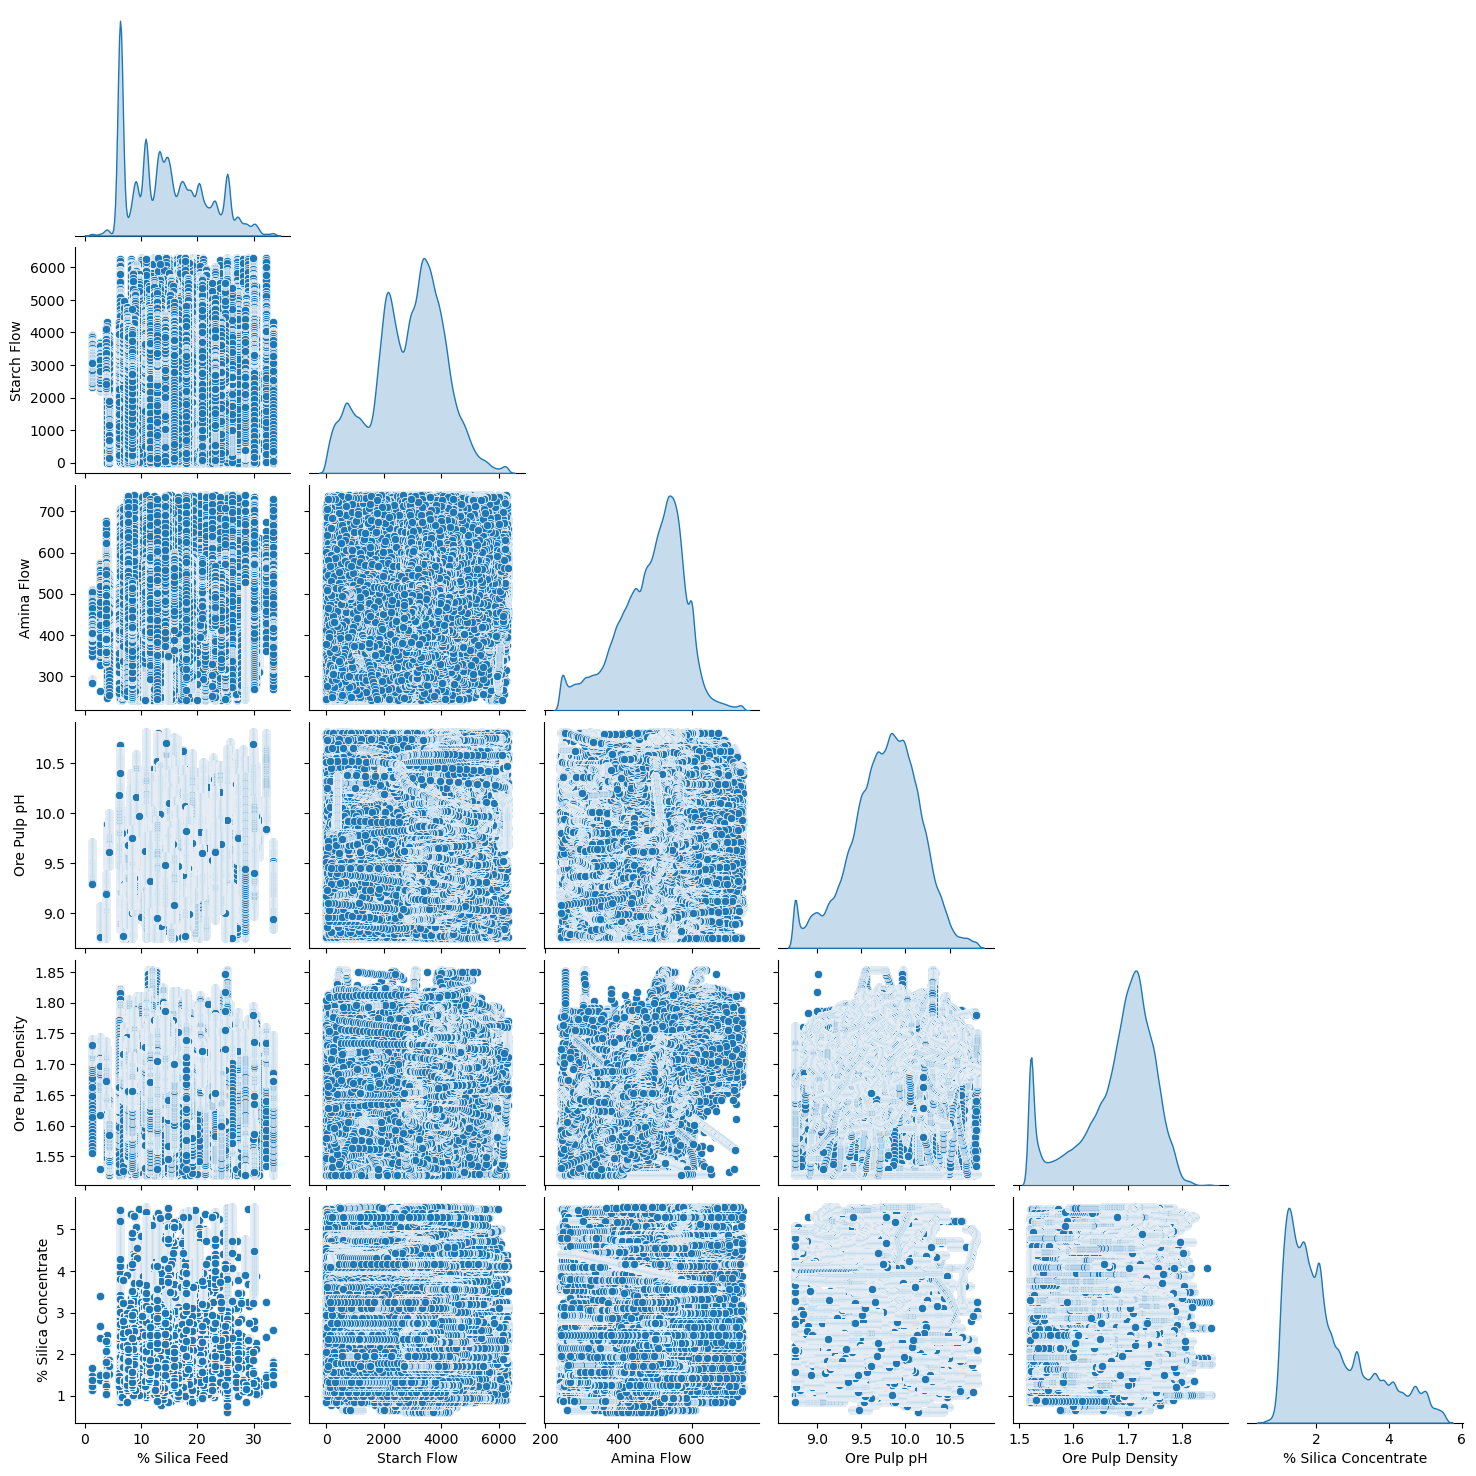

In [15]:
sns.pairplot(MinProcess_Flot_Plant, 
             vars=["% Silica Feed","Starch Flow", "Amina Flow", "Ore Pulp pH", "Ore Pulp Density", "% Silica Concentrate"],
             diag_kind="kde", 
             corner=True)
plt.show()

En el mapa de correlaciones visual no se identifican relaciones lineales evidentes entre las variables físico-químicas y la variable objetivo (% Sílica Concentrate). Sin embargo, se observa una leve asociación entre *Amina Flow* y *Ore Pulp Density*, la cual fue confirmada al cuantificarla mediante la matriz de correlación de Pearson.

## Preprocesamiento de datos

#### Eliminar variables altamente correlacionadas entre sí 

In [68]:
MinProcess_Flot_Plant_new = MinProcess_Flot_Plant.drop(columns=['Flotation Column 03 Air Flow', 'Flotation Column 01 Air Flow', '% Iron Feed']) 
MinProcess_Flot_Plant_new

,date,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,16.98,3019.53,557.43,395.71,10.07,1.74,253.24,295.10,306.40,...,250.88,457.40,432.96,424.95,443.56,502.25,446.37,523.34,66.91,1.31
1,2017-03-10 01:00:00,16.98,3024.41,563.97,397.38,10.07,1.74,250.53,295.10,306.40,...,248.99,451.89,429.56,432.94,448.09,496.36,445.92,498.07,66.91,1.31
2,2017-03-10 01:00:00,16.98,3043.46,568.05,399.67,10.07,1.74,247.87,295.10,306.40,...,248.07,451.24,468.93,434.61,449.69,484.41,447.83,458.57,66.91,1.31
3,2017-03-10 01:00:00,16.98,3047.36,568.66,397.94,10.07,1.74,254.49,295.10,306.40,...,251.15,452.44,458.17,442.87,446.21,471.41,437.69,427.67,66.91,1.31
4,2017-03-10 01:00:00,16.98,3033.69,558.17,400.25,10.07,1.74,252.14,295.10,306.40,...,248.93,452.44,452.90,450.52,453.67,462.60,443.68,425.68,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,23.20,2710.94,441.05,386.57,9.62,1.65,298.79,299.92,299.62,...,313.69,392.16,430.70,872.01,418.73,497.55,446.36,416.89,64.27,1.71
737449,2017-09-09 23:00:00,23.20,2692.01,473.44,384.94,9.62,1.65,301.88,299.71,300.46,...,236.70,401.50,404.62,864.41,418.38,506.40,373.00,426.34,64.27,1.71
737450,2017-09-09 23:00:00,23.20,2692.20,500.49,383.50,9.62,1.65,307.40,299.93,299.71,...,225.88,408.90,399.32,867.60,419.53,503.41,336.04,433.13,64.27,1.71
737451,2017-09-09 23:00:00,23.20,1164.12,491.55,384.98,9.62,1.65,301.96,299.37,298.82,...,308.12,405.11,466.83,876.59,407.30,502.30,340.84,433.97,64.27,1.71


#### Eliminar outliers

- **Conservar outliers si representan eventos reales del proceso** (arranques, paradas, fallas) y los estás analizando como parte de la variabilidad operativa.
- **Elimínarlos si son errores de medición, duplicados, o valores físicamente imposibles** según el contexto técnico.

Según la literatura y el contexto técnico compartido eliminaremos los siguientes outliers:

*Variables de alimentación:*
- Para *Ore Pulp Flow* datos atípicos correspondientes a valores muy bajos **(V̇ < 380 m³/h)**.
- Para *Ore Pulp pH* datos atípicos correspondientes a valores muy bajos **(pH < 9)**.
- Para *Ore Pulp Density* datos atípicos correspondientes a valores muy altos **(ρ < 1.5 g/cm³)**.

*Dosificación de reactivos:*
- Para *Starch Flow* datos atípicos correspondientes a valores muy altos **(V̇ > 6000 m³/h)**.
- Para *Amina Flow* datos atípicos correspondientes a valores muy bajos **(V̇ < 300 m³/h)** y muy altos **(V̇ > 700 m³/h)**.

In [69]:
# Definimos la máscara de outliers (todo lo que se quiere ELIMINAR)
df = MinProcess_Flot_Plant_new.copy()

mask_outliers = (
    (df ['Ore Pulp Flow'] < 380) |      # variables de alimentación 
    (df ['Ore Pulp pH'] < 9) |          # variables de alimentación
    (df ['Ore Pulp Density'] > 1.85) |  # variables de alimentación
    (df ['Starch Flow'] > 6000) |       # dosificación de reactivos
    (df ['Amina Flow'] < 300) |         # dosificación de reactivos
    (df ['Amina Flow'] > 700)           # dosificación de reactivos
)

# Nos quedamos con lo que NO es outlier
MinProcess_Flot_Plant_clean = df.loc[~mask_outliers].copy()

#Verificación rápida (para asegurar que sí se eliminaron)
assert (MinProcess_Flot_Plant_clean['Ore Pulp Flow'] >= 380).all()
assert (MinProcess_Flot_Plant_clean['Ore Pulp pH'] >= 9).all()
assert (MinProcess_Flot_Plant_clean['Ore Pulp Density'] <= 1.85).all()
assert (MinProcess_Flot_Plant_clean['Starch Flow'] <= 6000).all()
assert (MinProcess_Flot_Plant_clean['Amina Flow'] >= 300).all()
assert (MinProcess_Flot_Plant_clean['Amina Flow'] <= 700).all()

In [70]:
#Verificar cambios en la dimensionalidad del dataset
print(f"Dimensionalidad del dataset antes de eliminar outliers {MinProcess_Flot_Plant.shape}")
print(f"Dimensionalidad del dataset después de eliminar outliers {MinProcess_Flot_Plant_clean.shape}")

Dimensionalidad del dataset antes de eliminar outliers (737453, 24)
Dimensionalidad del dataset después de eliminar outliers (614544, 21)


## Procesamiento de datos 
### Pipeline

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
import category_encoders as ce

df = MinProcess_Flot_Plant_clean.copy()
y = df["% Silica Concentrate"]
X = df.drop(columns=['% Silica Concentrate', 'date'])

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
    ],
    remainder="passthrough"
)

In [72]:
#Visualizar pipeline de procesamiento
preprocess 

,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [73]:
X

,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,16.98,3019.53,557.43,395.71,10.07,1.74,253.24,295.10,306.40,250.22,250.88,457.40,432.96,424.95,443.56,502.25,446.37,523.34,66.91
1,16.98,3024.41,563.97,397.38,10.07,1.74,250.53,295.10,306.40,250.14,248.99,451.89,429.56,432.94,448.09,496.36,445.92,498.07,66.91
2,16.98,3043.46,568.05,399.67,10.07,1.74,247.87,295.10,306.40,251.34,248.07,451.24,468.93,434.61,449.69,484.41,447.83,458.57,66.91
3,16.98,3047.36,568.66,397.94,10.07,1.74,254.49,295.10,306.40,250.42,251.15,452.44,458.17,442.87,446.21,471.41,437.69,427.67,66.91
4,16.98,3033.69,558.17,400.25,10.07,1.74,252.14,295.10,306.40,249.98,248.93,452.44,452.90,450.52,453.67,462.60,443.68,425.68,66.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,23.20,2710.94,441.05,386.57,9.62,1.65,298.79,299.92,299.62,346.79,313.69,392.16,430.70,872.01,418.73,497.55,446.36,416.89,64.27
737449,23.20,2692.01,473.44,384.94,9.62,1.65,301.88,299.71,300.46,330.02,236.70,401.50,404.62,864.41,418.38,506.40,373.00,426.34,64.27
737450,23.20,2692.20,500.49,383.50,9.62,1.65,307.40,299.93,299.71,329.59,225.88,408.90,399.32,867.60,419.53,503.41,336.04,433.13,64.27
737451,23.20,1164.12,491.55,384.98,9.62,1.65,301.96,299.37,298.82,351.45,308.12,405.11,466.83,876.59,407.30,502.30,340.84,433.97,64.27


## Entrenamiento y Evaluación de los modelos

#### 1. Separación de la data de entrenamiento y prueba

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#### 2. Seleccionar los modelos a usar
Para este ejercicio por la cantidad de registros que se tienen y para evitar problemas de ineficiencia en la memoria, se evaluarán los modelos seleccionados por individual, las métricas de los mismos se guardarán en un documento excel, para posteriormente verlas todas en conjunto y observar el modelo con mejor rendimiento. Los modelos elegidos son:

- Decision Tree Regressor
- RandomForestRegressor
- Linear Regression
- ExtraTreesRegressor
- XGBRegressor
- BaggingRegressor

#### 3. Entrenar, Realizar predicción y Evaluar los modelos seleccionados

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

**Decision Tree Regression**

In [77]:
#Instanciar los modelos y configurar sus hiperparametros
model_DT = DecisionTreeRegressor(random_state=42)

# Entrenamiento y predicción
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

# Guardar métricas en un diccionario
metricas_DT = {
    "Modelo": "DecisionTreeRegressor",
    "MSE": mean_squared_error(y_test, y_pred_DT),
    "MAE": mean_absolute_error(y_test, y_pred_DT),
    "R2": r2_score(y_test, y_pred_DT)
}

# Guardar métricas y que persistan en varias corridas,a través de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_DT])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_DT

**Random Forest Regressor**

In [231]:
#Instanciar los modelos y configurar sus hiperparametros
model_RF = RandomForestRegressor(random_state=42,  max_features="sqrt",max_depth=20, min_samples_split=5, n_estimators=600, n_jobs=-1)

# Entrenamiento y predicción
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

# Guardar métricas en un diccionario
metricas_RF = {
    "Modelo": "RandomForestRegressor",
    "MSE": mean_squared_error(y_test, y_pred_RF),
    "MAE": mean_absolute_error(y_test, y_pred_RF),
    "R2": r2_score(y_test, y_pred_RF)
}

# Guardar métricas y que persistan en varias corridas,a través de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_RF])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---

**Linear Regression**

In [78]:
#Instanciar los modelos y configurar sus hiperparametros
model_Linear = LinearRegression(n_jobs=None)

# Entrenamiento y predicción
model_Linear.fit(X_train, y_train)
y_pred_Linear = model_Linear.predict(X_test)

# Guardar métricas en un diccionario
metricas_Linear = {
    "Modelo": "Linear Regression",
    "MSE": mean_squared_error(y_test, y_pred_Linear),
    "MAE": mean_absolute_error(y_test, y_pred_Linear),
    "R2": r2_score(y_test, y_pred_Linear)
}

# Guardar métricas y que persistan en varias corridas,a través de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_Linear])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_Linear

**ExtraTreesRegressor**

In [26]:
#Instanciar los modelos y configurar sus hiperparametros
model_ET = ExtraTreesRegressor(random_state=42, n_estimators=800, n_jobs=-1, max_features="sqrt")

# Entrenamiento y predicción
model_ET .fit(X_train, y_train)
y_pred_ET = model_ET.predict(X_test)

# Guardar métricas en un diccionario
metricas_ET = {
    "Modelo": "ExtraTreesRegressor",
    "MSE": mean_squared_error(y_test, y_pred_ET),
    "MAE": mean_absolute_error(y_test, y_pred_ET),
    "R2": r2_score(y_test, y_pred_ET)
}

# Guardar métricas y que persistan en varias corridas,a través de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_ET])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_ET

**XGBRegressor** (Configuración para datasets grandes)

In [79]:
#Instanciar los modelos y configurar sus hiperparametros
model_XGB = XGBRegressor(tree_method='hist', n_jobs=-1, verbosity=0) #Usa histogramas para acelerar el entrenamiento

# Entrenamiento y predicción
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)

# Guardar métricas en un diccionario
metricas_XGB = {
    "Modelo": "XGBoostRegressor",
    "MSE": mean_squared_error(y_test, y_pred_XGB),
    "MAE": mean_absolute_error(y_test, y_pred_XGB),
    "R2": r2_score(y_test, y_pred_XGB)
}

# Guardar métricas y que persistan en varias corridas,a través de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_XGB])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_XGB

**BaggingRegressor** (Configuración para datasets grandes)

In [80]:
#Instanciar los modelos y configurar sus hiperparametros
# Paso 1: Define el estimador base
base_tree = DecisionTreeRegressor(
    max_depth=10,        # Puedes ajustar según tu dataset
    min_samples_split=5, # Controla el crecimiento del árbol
    random_state=42
)

# Paso 2: Define el modelo Bagging
model_Bagging = BaggingRegressor(
    estimator=base_tree,
    n_estimators=50,       # Número de árboles (ajustable)
    max_samples=0.8,       # Fracción del dataset por árbol
    max_features=1.0,      # Usa todas las features
    bootstrap=True,        # Sampling con reemplazo
    n_jobs=-1,             # Usa todos los núcleos disponibles
    random_state=42
)

# Entrenamiento y predicción
model_Bagging.fit(X_train, y_train)
y_pred_Bagging = model_Bagging.predict(X_test)

# Guardar métricas en un diccionario
metricas_Bagging = {
    "Modelo": "BaggingRegressor",
    "MSE": mean_squared_error(y_test, y_pred_Bagging),
    "MAE": mean_absolute_error(y_test, y_pred_Bagging),
    "R2": r2_score(y_test, y_pred_Bagging)
}

# Guardar métricas y que persistan en varias corridas,a través de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_Bagging])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_Bagging

## Comparación de Modelos 

In [130]:
#Eliminar filas 
df_metricas = df_metricas.drop(index = [6,7,8])
df_metricas.reset_index(drop = True, inplace = True)

In [131]:
#Dataframe de métricas de evaluación
pd.options.display.float_format = "{:.3f}".format
print(df_metricas.sort_values(by='R2', ascending = False)) #imprimir métricas y ordenarlas por mejores modelos 

                  Modelo   MSE   MAE    R2
0  DecisionTreeRegressor 0.010 0.010 0.992
3    ExtraTreesRegressor 0.013 0.064 0.989
2  RandomForestRegressor 0.021 0.092 0.983
5       XGBoostRegressor 0.073 0.192 0.940
4       BaggingRegressor 0.142 0.266 0.884
1      Linear Regression 0.406 0.490 0.670


A partir del análisis de los seis modelos empleados para la predicción de la variable objetivo *% Silica Concentrate*, se observan métricas de desempeño favorables en la mayoría de los casos, con excepción del modelo de Regresión Lineal, cuyo ajuste es menos preciso. Esta diferencia se evidencia en valores de $ 𝑅^2 $ inferiores, mientras que los demás modelos superan el umbral de $ 𝑅^2 > 0.8 $, lo que indica una alta capacidad de explicación de la varianza.

El modelo con mejor rendimiento corresponde a **Decision Tree Regressor**, el cual alcanza un coeficiente de determinación de $ 𝑅^2 = 0.992 $, acompañado de valores bajos en el **Error Cuadrático Medio (MSE)** y el **Error Absoluto Medio (MAE)**. Aunque los demás modelos presentan valores de $ 𝑅^2$ cercanos, sus métricas de error son relativamente más altas, lo que sugiere una menor precisión en la estimación puntual de la variable target.

### Visualización de los mejores modelos

***DecisionTreeRegressor***

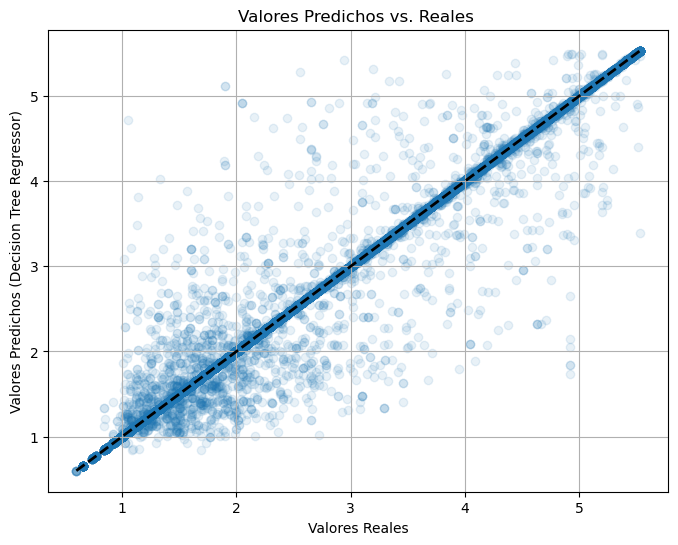

In [134]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, alpha=0.1)
plt.xticks(range(10)) #start, middle, end
plt.yticks(range(10)) #start, middle, end
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos (Decision Tree Regressor)')
plt.title('Valores Predichos vs. Reales ')

# Dibujar una línea digonal de referencia (línea y=x de identidad) - línea perfecta de predicción:
plt.plot([y_test.min(), y_test.max()], # X (límites mínimo y máximo de y_test)
         [y_test.min(), y_test.max()], # Y (límites mínimo y máximo de y_test)
         'k--', lw=2                   # línea negra discontinua 'k--' y grosor de la linea 'lw'
) 
plt.grid()
plt.show()

**Interpretación del desempeño del modelo DecisionTreeRegressor**

A partir de la visualización de la gráfica *Valores Predichos vs Reales* empleando el modelo Decision Tree Regressor, se pueden extraer varias observaciones relevantes:

- La mayoría de los *puntos se alinean casi perfectamente con la línea de predicción ideal* (diagonal), lo cual indica que el modelo logra una alta precisión en un número significativo de casos. Esta concentración de puntos alrededor de la diagonal respalda el favorable coeficiente de determinación $ 𝑅^2 $ que observamos previamente en las métricas, reflejando una **sólida capacidad predictiva** para esos datos en particular.

- Sin embargo, también se identifican puntos que se *desvían considerablemente* de dicha línea, lo que evidencia errores de predicción significativos en ciertos registros. Esta dispersión sugiere que, **aunque el modelo acierta con frecuencia, cuando falla lo hace con una magnitud considerable**, lo que podría comprometer su confiabilidad en escenarios sensibles o con alta variabilidad. En particular, estos errores podrían ser críticos en contextos donde las predicciones impactan directamente en factores como costos operativos, reputación institucional, procesos de auditoría o toma de decisiones estratégicas.

*¿Qué podemos concluir aquí?* Si bien el modelo muestra un desempeño aceptable en términos generales, la **amplitud de los errores** en los casos atípicos plantea dudas sobre su idoneidad como solución definitiva. 

### ¿Qué se propone hacer en este caso? 

Con el fin de tomar una decisión definitiva sobre el modelo más adecuado, se propone visualizar la distribución de los *valores predichos vs. reales* de otros modelos, incluso en aquellos casos donde las métricas de desempeño (como $𝑅^2$, $MAE$ o $MSE$) sean ligeramente inferiores. Esta comparación visual permitirá evaluar no solo la precisión global del modelo, sino también su **comportamiento frente a errores extremos, dispersión y sensibilidad a valores atípicos**. 

El objetivo es identificar el modelo que, además de **ofrecer métricas aceptables, presente una distribución de errores más controlada y consistente**, especialmente en contextos donde las *desviaciones pueden tener implicaciones críticas* en términos de costos, auditoría o reputación institucional.

***RandomForestRegressor***

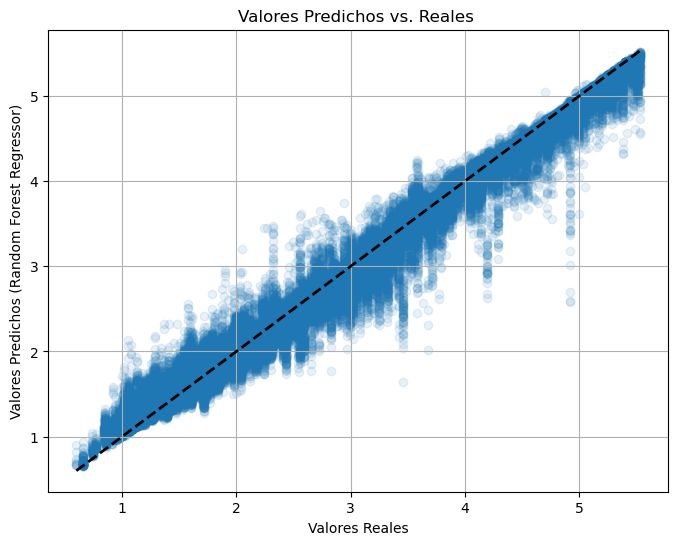

In [151]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RF, alpha=0.1)
plt.xticks(range(10)) #start, middle, end
plt.yticks(range(10)) #start, middle, end
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos (Random Forest Regressor)')
plt.title('Valores Predichos vs. Reales ')

# Dibujar una línea digonal de referencia (línea y=x de identidad) - línea perfecta de predicción:
plt.plot([y_test.min(), y_test.max()], # X (límites mínimo y máximo de y_test)
         [y_test.min(), y_test.max()], # Y (límites mínimo y máximo de y_test)
         'k--', lw=2                   # línea negra discontinua 'k--' y grosor de la linea 'lw'
) 
plt.grid()
plt.show()

**Interpretación del desempeño del modelo RandomForestRegressor**

De la interprestación de la gráfica anterior podemos resaltar varios aspectos: 

- Se observa una *alta concentración de puntos alrededor de la línea de predicción perfecta*(diagonal), como una **Nube** podría explicarse, lo que indica que el modelo logra **estimaciones muy cercanas a los valores reales en la mayoría de los casos**, sin embargo, cabe aclarar que esta predicción no es tan precisa como en **Decision Tree Regressor**, pues los puntos se acumulan como en una nube alrededor de la linea de prediccion perfecta pero no encima como pasa en Decisiton Tree. Pero se puede afirmar de igual forma que la alineación el modelo presenta un comportamiento robusto y una capacidad predictiva sólida.

- A diferencia de modelos más sensibles como la **Linear Regression**, **Random Forest** tiende a *reducir el impacto de valores atípicos gracias a su estructura basada en múltiples árboles de decisión*. Esto se refleja en la *baja dispersión de los puntos y en la ausencia de errores extremos* visibles en la gráfica.

*¿Qué podemos concluir aquí?* La visualización respalda el buen desempeño del Random Forest Regressor, en términos de precisión. Si las métricas como $𝑅^2$, $MAE$ o $MSE$ acompañan esta evidencia visual con valores competitivos, este modelo **podría considerarse como una opción viable y confiable** para la predicción de % Silica Concentrate.

***XGBoostRegressor***

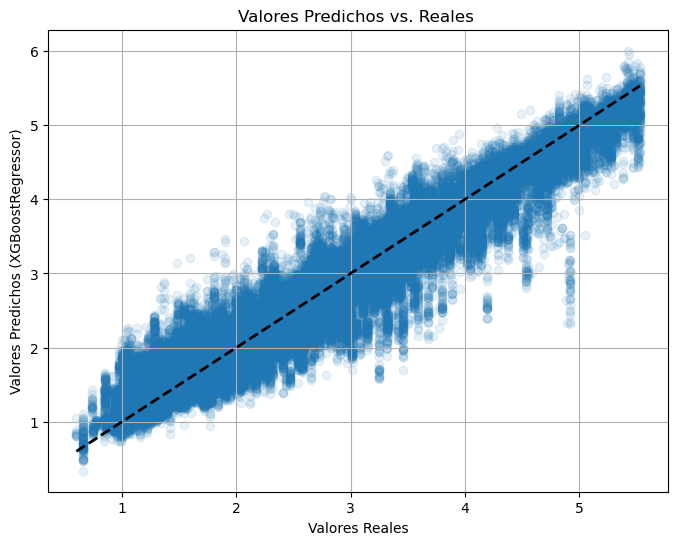

In [136]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XGB, alpha=0.1)
plt.xticks(range(10)) #start, middle, end
plt.yticks(range(10)) #start, middle, end
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos (XGBoostRegressor)')
plt.title('Valores Predichos vs. Reales ')

# Dibujar una línea digonal de referencia (línea y=x de identidad) - línea perfecta de predicción:
plt.plot([y_test.min(), y_test.max()], # X (límites mínimo y máximo de y_test)
         [y_test.min(), y_test.max()], # Y (límites mínimo y máximo de y_test)
         'k--', lw=2                   # línea negra discontinua 'k--' y grosor de la linea 'lw'
) 
plt.grid()
plt.show()

**Interpretación del desempeño del modelo XGBoostRegressor**

De la interprestación de la gráfica anterior podemos resaltar varios aspectos:

- El modelo de **XGBoost** muestra un comportamiento similar aunque con **menor precisión en los valores medios** en comparación al modelo de **RandomForest**. Aún así la mayoría de los puntos se agrupan en torno a la línea diagonal ideal $ 𝑦 = 𝑥 $, lo que indica una buena concordancia entre los valores predichos y los reales.
- No obstante, al comparar ambos modelos con mayor detalle, se observa que **XGBoost presenta menor dispersión en los extremos del rango de valores**, lo cual sugiere una mejor capacidad para manejar casos atípicos o valores poco frecuentes. Esta característica indica que el modelo logra predicciones más precisas incluso en escenarios complejos o menos representativos del conjunto de datos.

## Visualización de los *errores cuadrados* para elegir el modelo que se ajuste a nuestras necesidades

Una vez visualizada la distribución de las predicciones para los tres modelos evaluados ***Decision Tree Regressor, Random Forest Regressor*** y ***XGBoost Regressor*** y analizadas cualitativamente sus características en cuanto a precisión y amplitud de los errores a través del scatterplot, se procederá a **cuantificar dichos errores mediante un análisis por cuartiles**. Esta segmentación permitirá identificar no solo el comportamiento promedio del modelo, sino también su **desempeño en los rangos más críticos de error**.

El objetivo de esta evaluación es determinar cuál de los modelos se adapta mejor a las exigencias de una planta industrial dedicada al proceso de recuperación de sílice, donde la precisión en la estimación de concentraciones es clave para garantizar eficiencia operativa, control de calidad y cumplimiento normativo. La elección del modelo óptimo no se basará únicamente en métricas globales como el $𝑅^2$, sino también en su capacidad para mantener errores controlados en los distintos niveles de predicción.

### Visualización de la dispersión de los errores a través de un Violinplot
Antes de proceder con la cuantificación estadística de los errores, se realiza una visualización exploratoria mediante **violinplots**, una herramienta gráfica que permite analizar la **distribución y densidad** de los errores cometidos por cada modelo en la predicción del % Silica Concentrate.

El **violinplot** se utiliza para representar la distribución de una variable y contiene en su centro un boxplot tradicional (que muestra los cuartiles, la mediana y los valores extremos) y a los lados de este una **densidad de probabilidad** de los datos, representada por la forma del *“violín”*. Esto permite identificar no solo el rango de los errores, sino también **dónde se concentran la mayoría de las predicciones** y si existen **asimetrías, picos o dispersión** que podrían afectar la confiabilidad del modelo.

En este caso, los violinplots permiten:

➱ Comparar visualmente la **amplitud de los errores** entre modelos.

➱ Detectar **acumulaciones de errores bajos o altos**, lo que indica precisión o inestabilidad.

➱ Identificar **outliers o comportamientos atípicos** que podrían pasar desapercibidos en métricas agregadas.

➱ Evaluar la **forma de la distribución**, lo cual es clave para entender si el modelo tiende a sobreestimar o subestimar sistemáticamente.

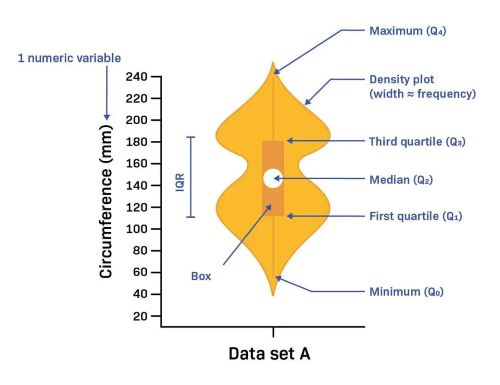

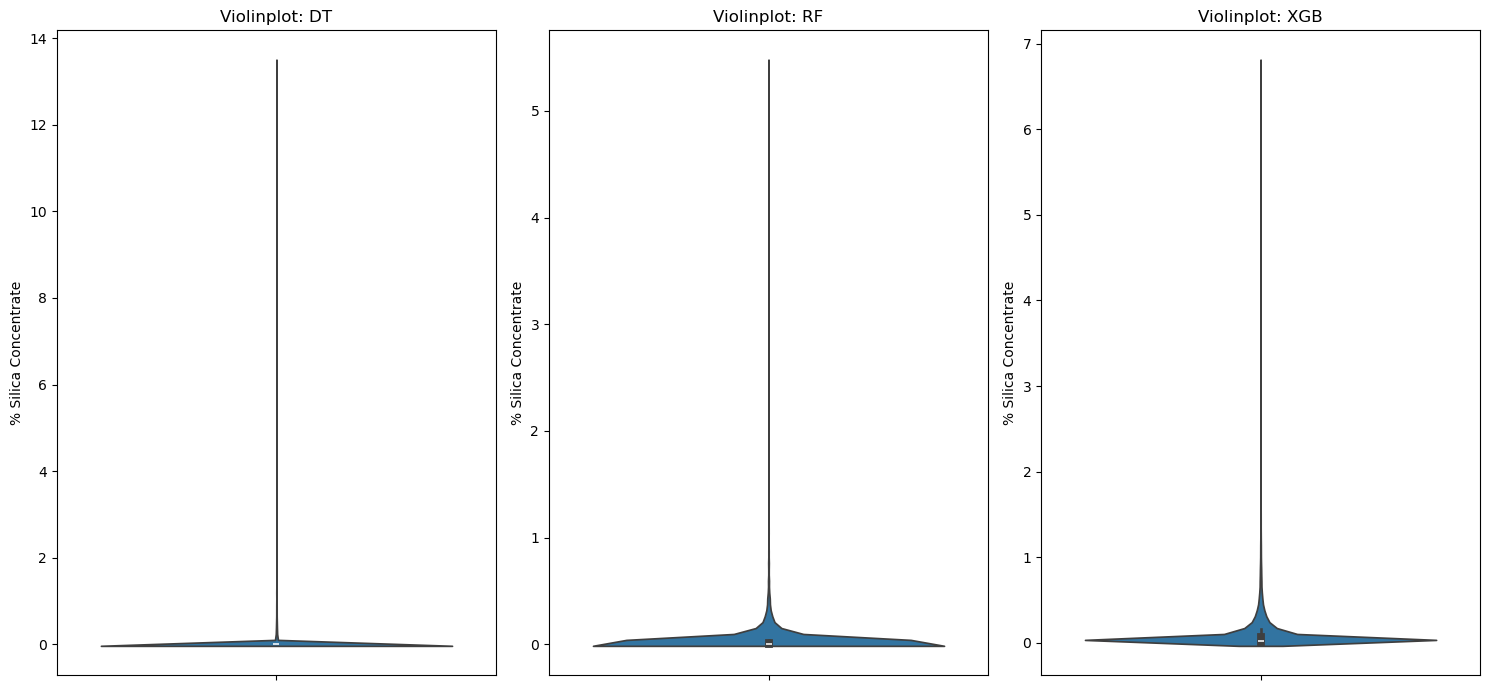

In [150]:
#Violinplot para visualizar la distribución de los errores de los modelos
#Calcular errores cuadrados para los mejores modelos
squared_errors_DT = (y_test - y_pred_DT) ** 2
squared_errors_RF = (y_test - y_pred_RF) ** 2
squared_errors_XGB = (y_test - y_pred_XGB) ** 2

# Diccionario que mapea el nombre del modelo con la variable que guarda su error asociado
squared_errors_models = { 
    'DT':squared_errors_DT,
    'RF':squared_errors_RF,
    'XGB':squared_errors_XGB
}

#Crear subplots
fig, axs = plt.subplots(1, len(squared_errors_models), figsize = (15,7))

#Bucle para gráficar
for i, (modelo, errores) in enumerate(squared_errors_models.items()):
        ax = axs[i]
        ax.set_title("Violinplot: " + f'{modelo}')
        sns.violinplot(y= errores, ax=ax) #Usamos y=errores para gráfica verticalmente

plt.tight_layout()
plt.show() 

**Interpretación de la distribución del error en las predicciones**

Cada gráfico representa la distribución del **"% Slice Correctness"**, es decir, qué tan cerca estuvo cada modelo de predecir correctamente el porcentaje de sílice en cada muestra. Analizaremos modelo por modelo:

#### 1. Decision Tree (DT)
- **Rango amplio de errores**, se observa que el eje vertical llega hasta ~14, lo que indica que este modelo tiene predicciones con errores bastante altos.
- **Distribución dispersa**, lo que se ve reflejado en la forma del violín, la que indica que hay una mayor dispersión en los datos, con varios outliers.

*Conclusión:* Aunque puede capturar patrones simples, su falta de generalización lo hace menos confiable para procesos industriales donde la precisión es crítica.

#### 2. Random Forest (RF)
- **Rango más estrecho (~0–5)**, esto indica mayor estabilidad en las predicciones.
- **Distribución más concentrada**, se osberva que la mayoría de los valores están agrupados cerca del eje inferior, lo que sugiere menor error promedio.

*Conclusión:* Este modelo parece ser más robusto y consistente, lo cual es ideal para ambientes industriales con variabilidad controlada.

#### 3. XGBoost (XGB)
- **Rango intermedio (~0–7)**, este modelo tiene más dispersión que RF pero menos que DT.
- **Distribución bimodal o con picos**, este modelo puede estar capturando relaciones más complejas, pero también introduce cierta variabilidad.

*Conclusión:* Potente en términos de modelado, pero podría requerir ajustes para evitar sobreajuste o errores extremos.

### Cuantificación de los *errores cuadrados* por rangos intercuartilicos (medir frecuencia de errores por rangos)

Cuantificar los errores por rangos intercuartílicos (IQR, Interquartile Range) es útil porque el IQR nos da una medida robusta de la dispersión de los datos, y aplicarlo a los errores (residuales de un modelo, diferencias de medición) nos permite entender mejor cómo se distribuyen y detectar anomalías.

**1. Robustez frente a valores atípicos**
- La desviación estándar y la varianza se ven muy afectadas por outliers.
- El rango intercuartílico (Q3 – Q1) se concentra en el 50% central de los datos, por lo que no se distorsiona si hay errores extremos.

*Esto ayuda a tener una visión realista de qué tan grandes son los errores "normales"*.

**2. Comparabilidad entre conjuntos de datos o modelos**

Si comparamos errores de distintos procesos o modelos, el IQR te permite evaluar *cuál produce errores más concentrados y consistentes*, sin que la comparación se vea afectada por pocos casos extremos.


Entonces, al cuantificar errores por IQR, se puede expresar:

- **Mediana:** error típico.
- **IQR:** variabilidad de los errores centrales.
- **Outliers detectados:** errores excepcionales.

Esto es mucho más interpretativo que solo dar promedio de los errores por modelo.

In [180]:
#Calculo de los cuartiles 

for i, (modelo, errores) in enumerate(squared_errors_models.items()):
    q1 = np.percentile(errores, 25)
    q2 = np.percentile(errores, 50)
    q3 = np.percentile(errores, 75)
    iqr = q3 - q1

    print(f"Rangos intercuartlicos para el modelo {modelo}")
    print(f"El valor del error del primer cuartil (percentil 25) es igual a: {q1}")
    print(f"El valor del error del segundo cuartil (percentil 50) es igual a: {q2}")
    print(f"El valor del error del tercer cuartil (percentil 75) es igual a: {q3}")
    print(f"El rango intercuartil del valor de los errores es igual a: {iqr}\n")

Rangos intercuartlicos para el modelo DT
El valor del error del primer cuartil (percentil 25) es igual a: 0.0
El valor del error del segundo cuartil (percentil 50) es igual a: 7.888609052210118e-31
El valor del error del tercer cuartil (percentil 75) es igual a: 1.262177448353619e-29
El rango intercuartil del valor de los errores es igual a: 1.262177448353619e-29

Rangos intercuartlicos para el modelo RF
El valor del error del primer cuartil (percentil 25) es igual a: 0.00038447775108659595
El valor del error del segundo cuartil (percentil 50) es igual a: 0.0030043940248568966
El valor del error del tercer cuartil (percentil 75) es igual a: 0.014751308029582513
El rango intercuartil del valor de los errores es igual a: 0.014366830278495918

Rangos intercuartlicos para el modelo XGB
El valor del error del primer cuartil (percentil 25) es igual a: 0.0034934219394134763
El valor del error del segundo cuartil (percentil 50) es igual a: 0.018674874884766268
El valor del error del tercer cua

In [183]:
#Calculo del limite inferior y superior para identificar outliers
for i, (modelo, errores) in enumerate(squared_errors_models.items()):
    
    limite_inferior = max(q1 - 1.5 * iqr, errores[errores > (q1 - 1.5 * iqr)].min())
    limite_superior = min(q3 + 1.5 * iqr, errores[errores < (q3 + 1.5 * iqr)].max())

    print(f"Modelo {modelo}")
    print(f"Límite inferior es igual a: {limite_inferior}")
    print(f"Límite superior es igual a: {limite_superior}\n")

Modelo DT
Límite inferior es igual a: 0.0
Límite superior es igual a: 0.16269179590286512

Modelo RF
Límite inferior es igual a: 4.738095811983702e-29
Límite superior es igual a: 0.16381495527539908

Modelo XGB
Límite inferior es igual a: 4.71482053667426e-13
Límite superior es igual a: 0.16382064331521407



In [219]:
#Identificacion de errores por rangos

results = [] #Lista para guardar resultados

for i, (modelo, errores) in enumerate(squared_errors_models.items()):

    error_debajo_liminf = errores[errores < limite_inferior]                # Erorres atipicos en rangos bajos ( < limite inferior)
    error_liminf_q1 = errores[(errores > limite_inferior) & (errores < q1)] # Erorres entre lim inferior y Q1
    error_q1_q2 = errores[(errores > q1) & (errores < q2)]                  # Erorres entre Q1 y Q2
    error_zero = errores[(errores == 0)]                                    # Erorres == 0 (Predicciones perfectas)
    error_q2_q3 = errores[(errores > q2) & (errores < q3)]                  # Erorres entre Q2 y Q3
    error_q3_limsup = errores[(errores > q3) & (errores < limite_superior)] # Erorres entre Q3 y Lim superior
    error_encima_limsup = errores[errores > limite_superior]                # Erorres atípicos en rangos altos ( > Lim superior)

    print(f"Errores cuádraticos (SE) por rangos para el modelo {modelo}")
    print(f"SE < lim inf: {len(error_debajo_liminf)}")
    print(f"lim inf < SE < Q1: {len(error_liminf_q1)}")
    print(f"Q1 < SE < Q2: {len(error_q1_q2)}")
    print(f"SE = 0, predicciones perfectas: {len(error_zero)}")
    print(f"Q2 < SE < Q3: {len(error_q2_q3)}")
    print(f"Q3 < SE < lim sup: {len(error_q3_limsup)}")
    print(f"SE > lim sup: {len(error_encima_limsup)}\n")

    #Guardar resultados en una lista de diccionarios
    results.append({
        'models': modelo,
        'SE < lim inf': len(error_debajo_liminf),
        'lim inf < SE < Q1': len(error_liminf_q1),
        'Q1 < SE < Q2': len(error_q1_q2),
        'SE = 0': len(error_zero),
        'Q2 < SE < Q3': len(error_q2_q3),
        'Q3 < SE < lim sup':len(error_q3_limsup),
        'SE > lim sup': len(error_encima_limsup)
    })

#Crear Dataframe con todos los resultados
df_errors_results = pd.DataFrame(results)

#Crear tabla pivot
pivot = pd.pivot_table(df_errors_results, 
                       values = ['SE < lim inf',
                                'lim inf < SE < Q1',
                                'Q1 < SE < Q2',
                                'SE = 0',
                                'Q2 < SE < Q3',
                                'Q3 < SE < lim sup',
                                'SE > lim sup'],
                       index='models', 
                       aggfunc=np.sum) # Contar el número de errores por rango

pivot = np.round(pivot,2)

Errores cuádraticos (SE) por rangos para el modelo DT
SE < lim inf: 111621
lim inf < SE < Q1: 9220
Q1 < SE < Q2: 425
SE = 0, predicciones perfectas: 33118
Q2 < SE < Q3: 383
Q3 < SE < lim sup: 286
SE > lim sup: 974

Errores cuádraticos (SE) por rangos para el modelo RF
SE < lim inf: 5
lim inf < SE < Q1: 64218
Q1 < SE < Q2: 32148
SE = 0, predicciones perfectas: 0
Q2 < SE < Q3: 17587
Q3 < SE < lim sup: 6185
SE > lim sup: 2766

Errores cuádraticos (SE) por rangos para el modelo XGB
SE < lim inf: 0
lim inf < SE < Q1: 30726
Q1 < SE < Q2: 30726
SE = 0, predicciones perfectas: 0
Q2 < SE < Q3: 30726
Q3 < SE < lim sup: 16602
SE > lim sup: 14124



C:\Users\THINKBOOK\AppData\Local\Temp\ipykernel_9584\3227055261.py:40: FutureWarning: The provided callable <function sum at 0x000001FFC28DA200> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(df_errors_results,


In [229]:
orden_cols = [
    'SE < limite inferior',
    'lim inf < SE < Q1',
    'Q1 < SE < Q2',
    'SE = 0',
    'Q2 < SE < Q3',
    'Q3 < SE < lim sup',
    'SE > lim sup',
]

pivot = pivot.reindex(columns=orden_cols)
pivot.sort_values(by=['SE = 0'], ascending = False)

# Mostrar con cuadrículas completas
pivot.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).set_properties(**{'border': '1px solid black'})

,SE < limite inferior,lim inf < SE < Q1,Q1 < SE < Q2,SE = 0,Q2 < SE < Q3,Q3 < SE < lim sup,SE > lim sup
models,,,,,,,
DT,nan,9220,425,33118,383,286,974
RF,nan,64218,32148,0,17587,6185,2766
XGB,nan,30726,30726,0,30726,16602,14124


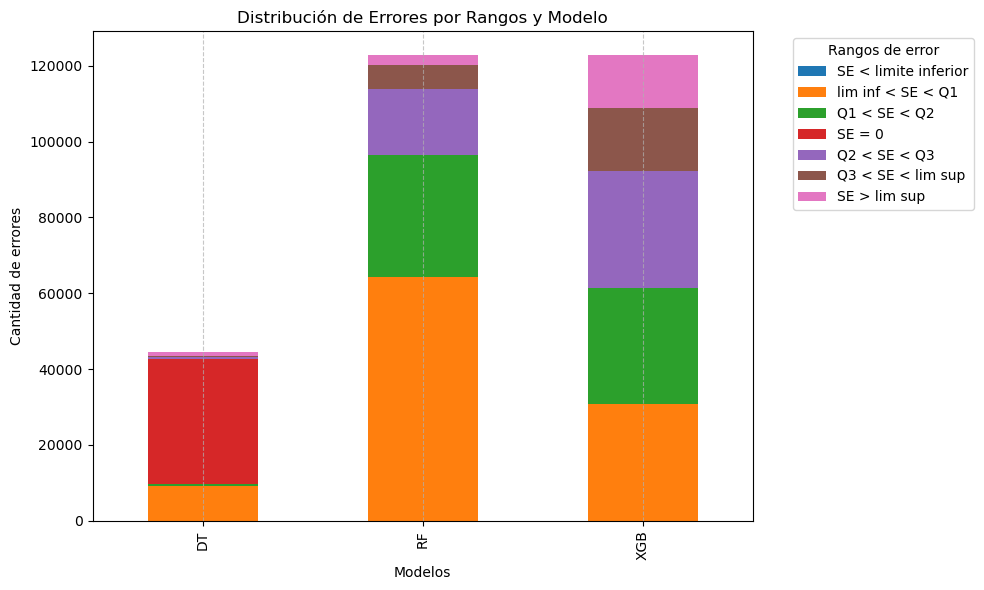

In [230]:
#Visualizar errores por rangos y modelo

# Crear gráfico de barras apiladas
pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# Agregar cuadrícula vertical
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title("Distribución de Errores por Rangos y Modelo")
plt.ylabel("Cantidad de errores")
plt.xlabel("Modelos")
plt.legend(title="Rangos de error", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### ¿Qué variables tienen más impacto en la predicción de impurezas? Evaluación del impacto de cada variable usando feature importance

Text(0, 0.5, 'Variables')

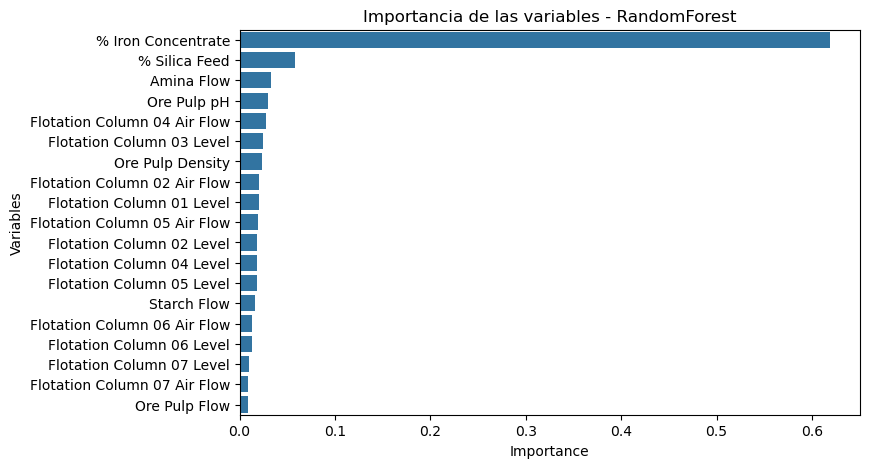

In [233]:
import pandas as pd
import seaborn as sns

X_resampled = df.drop(columns=['% Silica Concentrate', 'date'])

importances = model_RF.feature_importances_
feat_imp = pd.Series(importances, index=X_resampled.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Importancia de las variables - RandomForest")
plt.xlabel('Importance')
plt.ylabel('Variables')

La gráfica de importancia de variables del modelo **Random Forest** revela que la variable *"% Iron Concentrate"* tiene el mayor peso en la predicción del proceso de recuperación de sílice, seguido del *Amina Flow*. Esta influencia puede explicarse desde una perspectiva tanto mineralógica como operacional:

**1. Relación inversa entre hierro y sílice**

En procesos de flotación diferencial, como los utilizados en la separación de hierro y sílice, existe una competencia directa entre ambas especies minerales. *A medida que se incrementa la concentración de hierro en el concentrado, es común que la recuperación de sílice disminuya*, ya que el proceso está diseñado para **favorecer la selectividad del hierro**. Por tanto, el contenido de hierro actúa como un indicador **indirecto del grado de separación logrado.**

**2. Indicador de eficiencia del proceso**

La concentración de hierro en el producto final refleja la **eficiencia del circuito de flotación**, especialmente en columnas donde se aplican reactivos como *amina y almidón*. Un alto contenido de hierro puede implicar que el proceso está funcionando correctamente para rechazar sílice, mientras que desviaciones en esta variable pueden alertar sobre **problemas de selectividad, dosificación de reactivos o condiciones de operación.**

**3. Sensibilidad del modelo**

Desde el punto de vista del modelo de Random Forest, la variable *% Iron Concentrate* presenta una **alta capacidad discriminativa**, es decir, permite al algoritmo separar con claridad los distintos niveles de recuperación de sílice.

## Conclusiones 

A partir del análisis visual mediante violinplots y la segmentación estadística por rangos intercuartílicos, se concluye que el modelo **Random Forest** ofrece el mejor desempeño en términos de **estabilidad y control de errores**, lo que lo convierte en el candidato más adecuado para aplicaciones industriales como la recuperación de sílice (impureza, que se desea separar). Su **distribución de errores es más estrecha y menos dispersa**, lo que se traduce en mayor confiabilidad operativa y menor riesgo de desviaciones críticas.

El modelo **XGBoost**, aunque presenta una capacidad superior para capturar relaciones no lineales, muestra una **variabilidad más amplia en sus errores**, lo que requiere una evaluación cuidadosa de su tolerancia en entornos productivos. Por su parte, **Decision Tree**, si bien útil como referencia base, exhibe una dispersión significativa que lo hace menos recomendable para procesos donde la precisión y la consistencia son fundamentales.

El análisis por cuartiles ha demostrado ser una herramienta clave para identificar si los errores son **excepcionales o recurrentes**, permitiendo una comparación más robusta entre modelos. En contextos industriales, donde los errores extremos pueden comprometer la calidad del producto y la eficiencia del proceso, un RIQ estrecho y cuartiles bajos son indicadores de un modelo confiable y aplicable en planta.

Finalmente, se destaca que variables altamente correlacionadas como **% Fe** y **% SiO₂** en el concentrado deben ser tratadas con criterio. Aunque **Random Forest** maneja bien la multicolinealidad, excluir **% Fe** puede ser estratégico si el objetivo es identificar variables operativas con impacto directo en la recuperación de sílice, como el pH de la pulpa, el flujo de reactivos o las condiciones de las columnas de flotación.